In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm

In [3]:
consumer_data = pd.read_csv('ConsumerElectronics.csv')

In [4]:
consumer_data.shape
#(1648824, 19)

(1648824, 20)

In [5]:
consumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

## Let's check each column one by one

In [6]:
#converting order_date to datetime
consumer_data['order_date'] = pd.to_datetime(consumer_data['order_date'])

In [7]:
consumer_data['order_date'].dtype

dtype('<M8[ns]')

In [8]:
#Sort values by order_date
consumer_data=consumer_data.sort_values(by=['order_date'])

In [9]:
#We have to check if year and month is consistent with order_date
print((consumer_data['order_date'].dt.year == consumer_data['Year']).sum())
print((consumer_data['order_date'].dt.month == consumer_data['Month']).sum())

1648824
1648824


Hence Year and Month columns are in sync with the order_data column

In [10]:
# We have to covert order_id and order_item_id into proper format
# converting them to object format
consumer_data['order_id'] = consumer_data['order_id'].map(lambda x : '{:.0f}'.format(x))
consumer_data['order_item_id'] = consumer_data['order_item_id'].map(lambda x : '{:.0f}'.format(x))

In [11]:
consumer_data.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                   object
order_item_id                              object
gmv                                        object
units                                       int64
deliverybdays                              object
deliverycdays                              object
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64


In [12]:
consumer_data.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1376093,ACCDVZ83VBHCWFFA,2015-05-19 13:42:09,2015,5,146499482,188485029,3149,1,\N,\N,COD,6,-6.14850311678963E+018,-3.21775258155408E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,6990,4
1436634,VGLE4VR7XSQKYFG7,2015-06-11 18:21:50,2015,6,155827856,198823138,275,1,\N,\N,COD,8,1.58583155812679E+018,-3.70342091330123E+017,CE,EntertainmentSmall,TVVideoSmall,VideoGlasses,600,2
1398258,ACCE6VGHYKYFX4WB,2015-06-24 10:20:16,2015,6,161931009,205976637,188,1,\N,\N,COD,8,-4.88207864623487E+018,2.04427084691886E+018,CE,EntertainmentSmall,Speaker,LaptopSpeaker,310,-1
1385002,ACCE2V5DUDZVGFRK,2015-06-25 16:28:12,2015,6,163016530,207267972,250,1,\N,\N,COD,7,-4.27261305168723E+018,6.14822284391839E+018,CE,EntertainmentSmall,Speaker,LaptopSpeaker,400,4
1358453,ACCDFZEJ6ZGSWRMK,2015-06-26 17:02:01,2015,6,163400507,207701702,1119,1,\N,\N,COD,28,-7.47222175673193E+018,-9.779010321304E+017,CE,EntertainmentSmall,Speaker,LaptopSpeaker,2500,3


In [13]:
#Few columns were containing whitespace instead of Missing values. Replacing ' ' with NAs
consumer_data.replace([' ','\\N'], np.nan, inplace=True)

In [14]:
consumer_data['gmv'] = pd.to_numeric(consumer_data['gmv'])

In [15]:
consumer_data.isnull().sum()

fsn_id                                   0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                   4904
units                                    0
deliverybdays                      1312972
deliverycdays                      1312971
s1_fact.order_payment_type               0
sla                                      0
cust_id                               4904
pincode                               4904
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical             5828
product_mrp                              0
product_procurement_sla                  0
dtype: int64

In [16]:
#gmv is our target variable, rows containing null values are of no use, hence dropping them
consumer_data.dropna(subset = ['gmv'], inplace = True)

In [17]:
#Null value % for deliverybdays and deliverycdays
100 * consumer_data['deliverybdays'].isnull().sum() / len(consumer_data.index)

79.57017373108181

In [18]:
#Dropping deliverybdays and deliverycdays
consumer_data=consumer_data.drop(['deliverybdays','deliverycdays'],axis=1)

In [19]:
consumer_data.isnull().sum()

fsn_id                                0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                   0
units                                 0
s1_fact.order_payment_type            0
sla                                   0
cust_id                               0
pincode                               0
product_analytic_super_category       0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical          5814
product_mrp                           0
product_procurement_sla               0
dtype: int64

In [20]:
#checking units columns
(consumer_data['units'] <= 0).sum()

0

In [21]:
#Renaming Columns : s1_fact.order_payment_type
consumer_data=consumer_data.rename(columns={"s1_fact.order_payment_type": "order_payment_type"})

In [22]:
consumer_data['order_payment_type'].value_counts()

COD        1191443
Prepaid     452477
Name: order_payment_type, dtype: int64

In [23]:
#Dropping cust_id and pincode as we don't need them
consumer_data=consumer_data.drop(['cust_id','pincode'],axis=1)

In [24]:
consumer_data['product_analytic_super_category'].value_counts()

CE    1643920
Name: product_analytic_super_category, dtype: int64

In [25]:
# Column "product_analytic_super_category" have all the values as CE. Thus it won't contribute to analysis and hence dropped
consumer_data=consumer_data.drop('product_analytic_super_category',axis=1)

In [26]:
consumer_data.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [27]:
consumer_data.isna().sum()

fsn_id                              0
order_date                          0
Year                                0
Month                               0
order_id                            0
order_item_id                       0
gmv                                 0
units                               0
order_payment_type                  0
sla                                 0
product_analytic_category           0
product_analytic_sub_category       0
product_analytic_vertical        5814
product_mrp                         0
product_procurement_sla             0
dtype: int64

In [28]:
100 * consumer_data['product_analytic_vertical'].isnull().sum() / len(consumer_data.index)

0.35366684510195145

In [29]:
#We can drop the rows having  remaining nulls as they contribute to less than 1% data and hence there removal won't affect analysis.
consumer_data=consumer_data.dropna()

In [30]:
consumer_data.shape
#(1638106, 17)

(1638106, 15)

# Checking for duplicates

In [31]:
consumer_data.duplicated().sum()

104063

In [32]:
#104061 duplicates removed as they contribute to only 6% of the data and hence removed.
consumer_data=consumer_data.drop_duplicates()

In [33]:
consumer_data['order_item_id'].duplicated().sum()

62566

In [34]:
#order_item_id should be unique
consumer_data.drop_duplicates(subset = ['order_item_id'], keep='last', inplace=True)

In [35]:
consumer_data.shape

(1471477, 15)

### Working with sla and product_procurement_sla

In [36]:
#checking sla and product_procurement_sla
consumer_data['sla'].value_counts()

6       211980
5       208214
4       195906
7       180442
3       157189
8       139103
2        94682
9        88477
1        67606
10       52269
11       30571
12       17571
13        9929
0         5455
14        5280
15        2879
16        1631
17         813
18         448
19         263
20         149
21         100
25          75
22          68
24          66
23          57
26          52
27          41
28          32
30          28
29          16
31          10
32           9
35           7
33           6
38           6
42           5
39           5
34           4
44           3
41           3
40           3
36           3
61           3
37           2
45           2
60           1
239          1
184          1
175          1
145          1
68           1
1004         1
56           1
52           1
51           1
47           1
46           1
43           1
1006         1
Name: sla, dtype: int64

In [37]:
consumer_data['product_procurement_sla'].value_counts()

 2       476654
 1       272812
 3       270775
 5       195076
 4       107661
-1        67178
 0        39075
 6        15541
 7        10888
 15        5991
 14        4607
 1000      4096
 13         460
 8          454
 9           87
 10          67
 12          55
Name: product_procurement_sla, dtype: int64

In [38]:
#considering maximum delivery time should not be more than 60 days
consumer_data = consumer_data[(consumer_data['sla'] >=0) & (consumer_data['sla'] <= 60)]

In [39]:
#considering maximum dispatch time should not be more than 60 days
consumer_data = consumer_data[(consumer_data['product_procurement_sla'] >=0) & (consumer_data['product_procurement_sla'] <= 60)]

In [40]:
#creating a new feature: sla - product_procurement_sla
consumer_data['sla_diff'] = consumer_data['sla'] - consumer_data['product_procurement_sla']

In [41]:
#sla which is the final delivery time should always be greater than or equal to the time taken by the supplier to dispatch the product
consumer_data = consumer_data[consumer_data['sla_diff'] >= 0]

### Working with mrp, gmv and units

In [42]:
# Product MRP; gmv and units cannot be 0
consumer_data = consumer_data[(consumer_data['product_mrp']>0) & (consumer_data['gmv']>0) & (consumer_data['units']>0)]

In [43]:
# GMV 
# Subsetting out rows where equation MRP*units >= GMV doesn't hold. 
# Since we can offer discounts but cannot charge a higher price.
consumer_data = consumer_data[(consumer_data.product_mrp*consumer_data.units) >= consumer_data.gmv]

In [9]:
pd.options.display.float_format = '{:.2f}'.format

In [45]:
# computing discount
consumer_data['discount_percentage'] = (1-(consumer_data['gmv']/(consumer_data['product_mrp']*consumer_data['units'])))*100
consumer_data['discount_percentage'].head()

1376093   54.95
1436634   54.17
1385002   37.50
1358453   55.24
1429828   12.28
Name: discount_percentage, dtype: float64

In [46]:
# gmv per unit
consumer_data['gmv_per_unit'] = consumer_data['gmv']/consumer_data['units']

In [47]:
consumer_data.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit
1376093,ACCDVZ83VBHCWFFA,2015-05-19 13:42:09,2015,5,146499482,188485029,3149.00,1,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,6990,4,2,54.95,3149.00
1436634,VGLE4VR7XSQKYFG7,2015-06-11 18:21:50,2015,6,155827856,198823138,275.00,1,COD,8,EntertainmentSmall,TVVideoSmall,VideoGlasses,600,2,6,54.17,275.00
1385002,ACCE2V5DUDZVGFRK,2015-06-25 16:28:12,2015,6,163016530,207267972,250.00,1,COD,7,EntertainmentSmall,Speaker,LaptopSpeaker,400,4,3,37.50,250.00
1358453,ACCDFZEJ6ZGSWRMK,2015-06-26 17:02:01,2015,6,163400507,207701702,1119.00,1,COD,28,EntertainmentSmall,Speaker,LaptopSpeaker,2500,3,25,55.24,1119.00
1429828,PPRD7SGNCSGSEWDN,2015-06-26 17:27:12,2015,6,163409423,207711935,350.00,1,COD,5,CameraAccessory,CameraAccessory,CameraAccessory,399,3,2,12.28,350.00


### Dummy Variables

In [48]:
#creating dummy variables for order_payment_type
payment_dummy = pd.get_dummies(consumer_data['order_payment_type'], drop_first = True, prefix = 'order_payment_type')

In [49]:
consumer_data = pd.concat([consumer_data, payment_dummy], axis = 1)
consumer_data.drop(['order_payment_type'], axis = 1, inplace = True)
consumer_data.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid
1376093,ACCDVZ83VBHCWFFA,2015-05-19 13:42:09,2015,5,146499482,188485029,3149.00,1,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,6990,4,2,54.95,3149.00,0
1436634,VGLE4VR7XSQKYFG7,2015-06-11 18:21:50,2015,6,155827856,198823138,275.00,1,8,EntertainmentSmall,TVVideoSmall,VideoGlasses,600,2,6,54.17,275.00,0
1385002,ACCE2V5DUDZVGFRK,2015-06-25 16:28:12,2015,6,163016530,207267972,250.00,1,7,EntertainmentSmall,Speaker,LaptopSpeaker,400,4,3,37.50,250.00,0
1358453,ACCDFZEJ6ZGSWRMK,2015-06-26 17:02:01,2015,6,163400507,207701702,1119.00,1,28,EntertainmentSmall,Speaker,LaptopSpeaker,2500,3,25,55.24,1119.00,0
1429828,PPRD7SGNCSGSEWDN,2015-06-26 17:27:12,2015,6,163409423,207711935,350.00,1,5,CameraAccessory,CameraAccessory,CameraAccessory,399,3,2,12.28,350.00,0


## Filtering the data

In [50]:
# Since we have to use the data from July 2015 to June 2016, subsetting out data only between July 2015 and June 2016
consumer_data=consumer_data[(consumer_data['order_date'] >="2015-07-01") & (consumer_data['order_date'] <="2016-06-30")]

In [51]:
consumer_data.shape
#(1530172, 17)

(1197815, 18)

In [52]:
#Creating Date column without timestamp
consumer_data['Date'] = pd.to_datetime(consumer_data['order_date'].dt.date)

In [53]:
# Creating weeks columns
consumer_data['week'] = consumer_data['Date'].dt.week

In [54]:
consumer_data['week'].max()

53

In [55]:
# Setting weeks in continuation for the next year 
# July 2015 should have week 1 and June 2016 should have last week i.e. 53rd week for continuation in analysis
consumer_data['week'] = np.where((consumer_data['week'] >= 27) & (consumer_data['week'] <= 53), 
                                 consumer_data['week'] - 26, consumer_data['week'] + 27)

In [56]:
consumer_data['week'].max()

53

In [57]:
consumer_data[consumer_data['week'] == 53]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,Date,week
1257069,ACCEAXVKXXWFZGDM,2016-06-27 00:00:46,2016,6,2638211113531200,2638211113531200,3740.00,1,4,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,5990,2,2,37.56,3740.00,0,2016-06-27,53
1247215,ACCE58P94S5YVBYG,2016-06-27 00:01:21,2016,6,3638210427204100,3638210427204100,1999.00,1,5,EntertainmentSmall,Speaker,MobileSpeaker,3490,1,4,42.72,1999.00,0,2016-06-27,53
1335607,MICEGD63HTRF2995,2016-06-27 00:01:58,2016,6,1638208379943600,1638208379943600,1499.00,1,6,EntertainmentSmall,AudioAccessory,Microphone,1999,2,4,25.01,1499.00,0,2016-06-27,53
1237937,ACCDRJK2ZBHSNCFU,2016-06-27 00:02:42,2016,6,1638211003654100,1638211003654100,169.00,1,3,CameraAccessory,CameraAccessory,CameraBag,400,3,0,57.75,169.00,0,2016-06-27,53
1329667,GAMEAKNYFZWZVDMF,2016-06-27 00:03:34,2016,6,2638192888907600,2638192888907600,3088.00,1,6,GameCDDVD,Game,PhysicalGame,3999,4,2,22.78,3088.00,0,2016-06-27,53
1280460,ACCEEPGZUZKHQSJF,2016-06-27 00:05:09,2016,6,3638213586550800,3638213586550800,1745.00,1,4,EntertainmentSmall,Speaker,MobileSpeaker,2099,2,2,16.87,1745.00,0,2016-06-27,53
1292512,ACCEGE9FXF4YZANX,2016-06-27 00:07:08,2016,6,3638215210105200,3638215210105200,858.00,1,2,CameraAccessory,CameraStorage,CameraStorageMemoryCard,1599,2,0,46.34,858.00,0,2016-06-27,53
1302895,ACCEHYVEDEFBYU7G,2016-06-27 00:08:24,2016,6,2638212035416800,2638212035416800,565.00,1,6,GamingHardware,GamingAccessory,GamingHeadset,4999,2,4,88.70,565.00,0,2016-06-27,53
1347188,VGLEHXGRC9Z6Q62T,2016-06-27 00:09:14,2016,6,1638216518941200,1638216518941200,189.00,1,3,EntertainmentSmall,TVVideoSmall,VideoGlasses,190,2,1,0.53,189.00,0,2016-06-27,53
1330154,GAMEDKRZ5HGFAU87,2016-06-27 00:09:15,2016,6,1638213395773100,1638213395773100,2974.00,1,1,GameCDDVD,Game,PhysicalGame,3499,1,0,15.00,2974.00,1,2016-06-27,53


In [58]:
# Product analytic categories and super categories for the entire dataset
consumer_data['product_analytic_category'].value_counts()

EntertainmentSmall    702598
CameraAccessory       197427
GamingHardware        175711
Camera                 64774
GameCDDVD              57305
Name: product_analytic_category, dtype: int64

In [59]:
consumer_data['product_analytic_sub_category'].value_counts()

Speaker                399437
CameraAccessory        183118
GamingAccessory        155732
TVVideoSmall           108178
AudioMP3Player          93153
HomeAudio               86629
Camera                  64774
Game                    57221
GamingConsole           19979
CameraStorage           14309
AudioAccessory           8918
HomeTheatre              3667
AmplifierReceiver        2616
GameMembershipCards        84
Name: product_analytic_sub_category, dtype: int64

In [60]:
consumer_data['product_analytic_vertical'].value_counts()

MobileSpeaker              203758
LaptopSpeaker              195679
AudioMP3Player              93153
HomeAudioSpeaker            58803
GamingHeadset               54339
PhysicalGame                49493
Flash                       43646
GamePad                     42775
DSLR                        38824
RemoteControl               32906
VideoGlasses                30584
CameraBattery               28252
SelectorBox                 28180
GamingMouse                 27389
Lens                        26436
CameraTripod                26223
Point & Shoot               21630
FMRadio                     19473
VideoPlayer                 16508
HandheldGamingConsole       16083
CameraStorageMemoryCard     14309
CameraBag                   13171
CameraBatteryCharger        12187
Binoculars                  11724
Filter                       9114
CodeInTheBoxGame             7728
GamingAccessoryKit           7063
Microphone                   6822
TVOutCableAccessory          5818
GamingMemoryCa

In [61]:
consumer_data=consumer_data.drop(['fsn_id','Year','order_date', 'order_id','order_item_id','product_analytic_category',
                                  'product_analytic_vertical'], axis=1)

In [62]:
consumer_data.dtypes

Month                                     int64
gmv                                     float64
units                                     int64
sla                                       int64
product_analytic_sub_category            object
product_mrp                               int64
product_procurement_sla                   int64
sla_diff                                  int64
discount_percentage                     float64
gmv_per_unit                            float64
order_payment_type_Prepaid                uint8
Date                             datetime64[ns]
week                                      int64
dtype: object

In [63]:
TotalGMV = sum(consumer_data['gmv'])
TotalGMV

2664150786.3903785

In [64]:
consumer_data.shape

(1197815, 13)

In [65]:
# Filtering out rows were product sub category is camera accessory, home audio and gaming accessory.
consumer_data=consumer_data[(consumer_data['product_analytic_sub_category'] == 'CameraAccessory') |
                            (consumer_data['product_analytic_sub_category'] == 'GamingAccessory') |
                            (consumer_data['product_analytic_sub_category'] == 'HomeAudio') ]

In [66]:
consumer_data.shape

(425479, 13)

In [67]:
GMV = pd.DataFrame(consumer_data.groupby('product_analytic_sub_category',as_index=False)['gmv'].sum())
GMV

,product_analytic_sub_category,gmv
0,CameraAccessory,195458042.62
1,GamingAccessory,124809015.17
2,HomeAudio,179180686.93


In [68]:
# GMV % of the total; we will use the same to derive the marketing spend
GMV['gmv'] = GMV.gmv/TotalGMV
GMV

,product_analytic_sub_category,gmv
0,CameraAccessory,0.07
1,GamingAccessory,0.05
2,HomeAudio,0.07


In [69]:
consumer_data['product_analytic_sub_category'].value_counts()

CameraAccessory    183118
GamingAccessory    155732
HomeAudio           86629
Name: product_analytic_sub_category, dtype: int64

In [70]:
consumer_data.head()

,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,Date,week
1391518,7,385.00,1,10,GamingAccessory,699,4,6,44.92,385.00,1,2015-07-01,1
1407040,7,2249.00,1,7,HomeAudio,2800,4,3,19.68,2249.00,1,2015-07-01,1
1361916,7,428.00,1,7,GamingAccessory,999,3,4,57.16,428.00,1,2015-07-01,1
1420560,7,2950.00,1,6,HomeAudio,3299,5,1,10.58,2950.00,1,2015-07-01,1
1425546,7,1599.00,1,7,HomeAudio,3700,3,4,56.78,1599.00,1,2015-07-03,1


# Reading product list

In [71]:
# In case of Syntax error kindly upgrade xlrd module using command : pip install --upgrade xlrd
ProductList=pd.read_excel('Media data and other information.xlsx',skiprows=1,usecols='B:D')
ProductList.columns=['Products', 'Frequency', 'Percent']
ProductList.head()

,Products,Frequency,Percent
0,\N,5828,0.35
1,AmplifierReceiver,4056,0.25
2,AudioMP3Player,112892,6.85
3,Binoculars,14599,0.89
4,BoomBox,2879,0.17


In [72]:
#dropping product with name \N
ProductList.drop(index = 0, inplace = True)
ProductList.head()

,Products,Frequency,Percent
1,AmplifierReceiver,4056,0.25
2,AudioMP3Player,112892,6.85
3,Binoculars,14599,0.89
4,BoomBox,2879,0.17
5,Camcorders,987,0.06


# Making holiday  information usable 

In [73]:
SSC = pd.read_excel("Media data and other information.xlsx", sheet_name = 2,skiprows=1,usecols = 'B:C')
SSC.columns=["Year", "Event"]
SSC

,Year,Event
0,2015.00,(18-19th July)
1,nan,(15-17th Aug)
2,nan,(28-30th Aug)
3,nan,(17-15th Oct)
4,nan,(7-14th Nov)
5,nan,(25th Dec'15 - 3rd Jan'16)
6,2016.00,(20-22 Jan)
7,nan,(1-2 Feb)
8,nan,(20-21 Feb)
9,nan,(14-15 Feb)


In [74]:
#Cleaning SSC
#Removing last row
SSC= SSC.drop(SSC.index[-1])
#Filling NAs with the previous observation
SSC=SSC.ffill()
#Changing datatype of year from float to int
SSC['Year']=SSC['Year'].astype(int)

In [75]:
#Replacing extra chars to ''
SSC['Event']=SSC['Event'].str.replace('th','')
SSC['Event']=SSC['Event'].str.replace('rd','')
SSC['Event']=SSC['Event'].str.replace(')','')
SSC['Event']=SSC['Event'].str.replace('(','')

In [76]:
SSC

,Year,Event
0,2015,18-19 July
1,2015,15-17 Aug
2,2015,28-30 Aug
3,2015,17-15 Oct
4,2015,7-14 Nov
5,2015,25 Dec'15 - 3 Jan'16
6,2016,20-22 Jan
7,2016,1-2 Feb
8,2016,20-21 Feb
9,2016,14-15 Feb


In [77]:
#Create Start date and End date
#Getting start day and end day of sale
SSC[['start','end']] = SSC.Event.str.split("-",expand=True) 

In [78]:
#Removing leading and trailing spaces
SSC['start']=SSC['start'].str.strip()
SSC['end']=SSC['end'].str.strip()

In [79]:
#Getting start and end month
SSC[['start','start_mnth']]=SSC.start.str.split(" ",expand=True)
SSC[['end','end_mnth']]=SSC.end.str.split(" ",expand=True)
SSC['start_mnth'] = np.where(SSC['start_mnth'].isna(), SSC['end_mnth'], SSC['start_mnth'])

In [80]:
#Dealing with exceptional columns
SSC['start_mnth']=SSC['start_mnth'].str.replace('\'15','')
SSC['end_mnth']=SSC['end_mnth'].str.replace('\'16','')

In [81]:
#Getting sale end year
SSC['end_year']=SSC['Year']
SSC['end_year']=np.where(SSC['end_mnth']=='Jan',2016,SSC['Year'])

In [82]:
#Getting final sale start date and end date
SSC['start_date']=SSC['start']+'-'+SSC['start_mnth']+'-'+SSC['Year'].astype(str)
SSC['end_date']=SSC['end']+'-'+SSC['end_mnth']+'-'+SSC['end_year'].astype(str)

In [83]:
#Converting to datetime for future use
SSC['start_date']=pd.to_datetime(SSC['start_date'])
SSC['end_date']=pd.to_datetime(SSC['end_date'])


In [84]:
#Handling case where start date > end date
SSC["start_date"], SSC["end_date"] = np.where(SSC['start_date']>SSC['end_date'], 
                                              [SSC['end_date'], SSC['start_date']], 
                                              [SSC['start_date'], SSC['end_date']])

In [85]:
#Getting Count of days for which sale was there
import datetime
SSC['NumDays']=SSC['end_date'] - SSC['start_date'] + datetime.timedelta(days=1)


In [86]:
SSC

,Year,Event,start,end,start_mnth,end_mnth,end_year,start_date,end_date,NumDays
0,2015,18-19 July,18,19,July,July,2015,2015-07-18,2015-07-19,2 days
1,2015,15-17 Aug,15,17,Aug,Aug,2015,2015-08-15,2015-08-17,3 days
2,2015,28-30 Aug,28,30,Aug,Aug,2015,2015-08-28,2015-08-30,3 days
3,2015,17-15 Oct,17,15,Oct,Oct,2015,2015-10-15,2015-10-17,3 days
4,2015,7-14 Nov,7,14,Nov,Nov,2015,2015-11-07,2015-11-14,8 days
5,2015,25 Dec'15 - 3 Jan'16,25,3,Dec,Jan,2016,2015-12-25,2016-01-03,10 days
6,2016,20-22 Jan,20,22,Jan,Jan,2016,2016-01-20,2016-01-22,3 days
7,2016,1-2 Feb,1,2,Feb,Feb,2016,2016-02-01,2016-02-02,2 days
8,2016,20-21 Feb,20,21,Feb,Feb,2016,2016-02-20,2016-02-21,2 days
9,2016,14-15 Feb,14,15,Feb,Feb,2016,2016-02-14,2016-02-15,2 days


In [87]:
#Extarcting all the dates where sale was  there
EventDate=[]
for i in range(0,len(SSC)):
    for j in range(1,(SSC['NumDays'].dt.days)[i]+1):
        EventDate.append(SSC['start_date'][i] + datetime.timedelta(days=j-1))

In [88]:
EventDate=pd.DataFrame(EventDate,columns=['EventDate'])

In [89]:
EventDate.head()

,EventDate
0,2015-07-18
1,2015-07-19
2,2015-08-15
3,2015-08-16
4,2015-08-17


In [90]:
consumer_data = consumer_data.merge(EventDate, how='left',left_on = "Date", right_on = "EventDate")

In [91]:
consumer_data.head()

,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,Date,week,EventDate
0,7,385.00,1,10,GamingAccessory,699,4,6,44.92,385.00,1,2015-07-01,1,NaT
1,7,2249.00,1,7,HomeAudio,2800,4,3,19.68,2249.00,1,2015-07-01,1,NaT
2,7,428.00,1,7,GamingAccessory,999,3,4,57.16,428.00,1,2015-07-01,1,NaT
3,7,2950.00,1,6,HomeAudio,3299,5,1,10.58,2950.00,1,2015-07-01,1,NaT
4,7,1599.00,1,7,HomeAudio,3700,3,4,56.78,1599.00,1,2015-07-03,1,NaT


In [92]:
consumer_data.isna().sum()

Month                                 0
gmv                                   0
units                                 0
sla                                   0
product_analytic_sub_category         0
product_mrp                           0
product_procurement_sla               0
sla_diff                              0
discount_percentage                   0
gmv_per_unit                          0
order_payment_type_Prepaid            0
Date                                  0
week                                  0
EventDate                        353426
dtype: int64

In [93]:
consumer_data['special_sales'] = np.where(consumer_data.EventDate.isna(),0,1)

In [94]:
consumer_data=consumer_data.drop('EventDate',axis=1)
consumer_data.head()

,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,Date,week,special_sales
0,7,385.00,1,10,GamingAccessory,699,4,6,44.92,385.00,1,2015-07-01,1,0
1,7,2249.00,1,7,HomeAudio,2800,4,3,19.68,2249.00,1,2015-07-01,1,0
2,7,428.00,1,7,GamingAccessory,999,3,4,57.16,428.00,1,2015-07-01,1,0
3,7,2950.00,1,6,HomeAudio,3299,5,1,10.58,2950.00,1,2015-07-01,1,0
4,7,1599.00,1,7,HomeAudio,3700,3,4,56.78,1599.00,1,2015-07-03,1,0


### Analyzing sales on special sales day

In [95]:
#avearge sales 
consumer_data[consumer_data['special_sales']==1].gmv.mean()

1232.2222061998223

In [96]:
consumer_data[consumer_data['special_sales']==0].gmv.mean()

1161.4792192765617

In [97]:
consumer_data[consumer_data['special_sales']==1].gmv.sum()

96649348.74328305

In [98]:
consumer_data[consumer_data['special_sales']==0].gmv.sum()

410496954.552038

In [99]:
SSC['NumDays'].dt.days.sum()

47

Only 47 days contribute to approx. 24% of total revenue generated

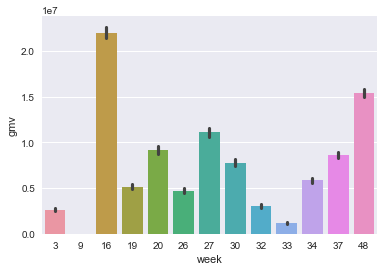

In [100]:
import seaborn as sns
sns.barplot(x = 'week', y = 'gmv', data = consumer_data[consumer_data['special_sales']==1], estimator = np.sum)

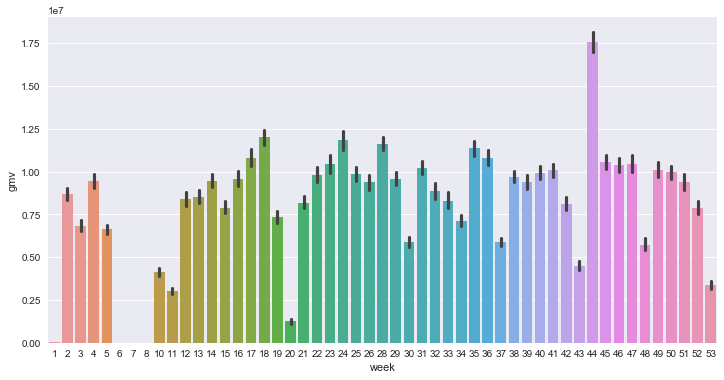

In [101]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'week', y = 'gmv', data = consumer_data[consumer_data['special_sales']==0], estimator = np.sum)

# Making NPS and Stock Index usable 

In [102]:
Monthly_NPS_stock = pd.read_excel("Media data and other information.xlsx", sheet_name = 3)

The NPS or Net Promoter Score is an index ranging from -100 to 100 that measures the willingness of customers to recommed 
a company's products or services to others. It is used as a proxy for gauging the customer's overall satisfaction with a company's product or service and the customer's loyalty to the brand.

In [103]:
Monthly_NPS_stock

,Unnamed: 0,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
1,Stock Index,1177.00,1206.00,1101.00,1210.00,1233.00,1038.00,1052.00,1222.00,1015.00,1242.00,1228.00,1194.00


In [104]:
Monthly_NPS_stock.set_index(['Unnamed: 0'], inplace = True)
Monthly_NPS_stock.index.name = ""
Monthly_NPS_stock

,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
,,,,,,,,,,,,
NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
Stock Index,1177.00,1206.00,1101.00,1210.00,1233.00,1038.00,1052.00,1222.00,1015.00,1242.00,1228.00,1194.00


In [105]:
Monthly_NPS_stock = Monthly_NPS_stock.T
Monthly_NPS_stock

,NPS,Stock Index
July'15,54.60,1177.00
Aug'15,59.99,1206.00
Sept'15,46.93,1101.00
Oct'15,44.40,1210.00
Nov'15,47.00,1233.00
Dec'15,45.80,1038.00
Jan'16,47.09,1052.00
Feb'16,50.33,1222.00
Mar'16,49.02,1015.00
Apr'16,51.83,1242.00


In [106]:
Monthly_NPS_stock.index = list([7,8,9,10,11,12,1,2,3,4,5,6])

In [107]:
Monthly_NPS_stock

,NPS,Stock Index
7,54.60,1177.00
8,59.99,1206.00
9,46.93,1101.00
10,44.40,1210.00
11,47.00,1233.00
12,45.80,1038.00
1,47.09,1052.00
2,50.33,1222.00
3,49.02,1015.00
4,51.83,1242.00


In [108]:
consumer_data= consumer_data.merge(Monthly_NPS_stock, how='left', left_on = 'Month', right_index = True)

In [109]:
consumer_data.head()

,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,Date,week,special_sales,NPS,Stock Index
0,7,385.00,1,10,GamingAccessory,699,4,6,44.92,385.00,1,2015-07-01,1,0,54.60,1177.00
1,7,2249.00,1,7,HomeAudio,2800,4,3,19.68,2249.00,1,2015-07-01,1,0,54.60,1177.00
2,7,428.00,1,7,GamingAccessory,999,3,4,57.16,428.00,1,2015-07-01,1,0,54.60,1177.00
3,7,2950.00,1,6,HomeAudio,3299,5,1,10.58,2950.00,1,2015-07-01,1,0,54.60,1177.00
4,7,1599.00,1,7,HomeAudio,3700,3,4,56.78,1599.00,1,2015-07-03,1,0,54.60,1177.00


In [110]:
consumer_data.isna().sum()

Month                            0
gmv                              0
units                            0
sla                              0
product_analytic_sub_category    0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
Date                             0
week                             0
special_sales                    0
NPS                              0
Stock Index                      0
dtype: int64

# Making media spent information usable

In [111]:
MediaInvestment = pd.read_excel("Media data and other information.xlsx", sheet_name = 1,skiprows=2,usecols = 'B:M')

In [112]:
MediaInvestment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.00,7.00,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,nan,nan
1,2015.00,8.00,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,nan,nan
2,2015.00,9.00,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,nan,nan
3,2015.00,10.00,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,nan,nan
4,2015.00,11.00,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,nan,nan
5,2015.00,12.00,106.75,5.40,3.06,56.71,1.07,22.50,6.83,11.18,nan,nan
6,2016.00,1.00,74.20,4.38,0.46,4.20,0.90,22.90,7.37,4.20,2.70,27.09
7,2016.00,2.00,48.05,2.59,1.91,11.73,0.60,19.89,6.47,4.87,nan,nan
8,2016.00,3.00,100.02,9.30,2.10,41.59,0.37,18.44,6.22,5.19,0.87,15.95
9,2016.00,4.00,56.85,5.21,0.87,24.31,0.03,16.51,5.69,4.22,nan,nan


In [113]:
MediaInvestment = MediaInvestment.iloc[0:12]
MediaInvestment=MediaInvestment.fillna(0)
MediaInvestment.drop(['Year'], axis = 1, inplace = True)

In [114]:
MediaInvestment['Month'] = MediaInvestment['Month'].astype('int')
MediaInvestment.set_index(['Month'], inplace = True)
MediaInvestment

,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
Month,,,,,,,,,,
7,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
8,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00,0.00
9,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00,0.00
10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00,0.00
11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00,0.00
12,106.75,5.40,3.06,56.71,1.07,22.50,6.83,11.18,0.00,0.00
1,74.20,4.38,0.46,4.20,0.90,22.90,7.37,4.20,2.70,27.09
2,48.05,2.59,1.91,11.73,0.60,19.89,6.47,4.87,0.00,0.00
3,100.02,9.30,2.10,41.59,0.37,18.44,6.22,5.19,0.87,15.95


In [115]:
MediaInvestment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 7 to 6
Data columns (total 10 columns):
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
 Affiliates          12 non-null float64
SEM                  12 non-null float64
Radio                12 non-null float64
Other                12 non-null float64
dtypes: float64(10)
memory usage: 1.0 KB


In [116]:
MediaInvestment.rename(columns = {' Affiliates': 'Affiliates'}, inplace = True)

In [117]:
consumer_data= consumer_data.merge(MediaInvestment, how='left', left_on = 'Month', right_index = True)

In [118]:
consumer_data.isna().sum()

Month                            0
gmv                              0
units                            0
sla                              0
product_analytic_sub_category    0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
Date                             0
week                             0
special_sales                    0
NPS                              0
Stock Index                      0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
Affiliates                       0
SEM                              0
Radio                            0
Other                            0
dtype: int64

In [119]:
consumer_data.head()

,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,...,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,7,385.00,1,10,GamingAccessory,699,4,6,44.92,385.00,...,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
1,7,2249.00,1,7,HomeAudio,2800,4,3,19.68,2249.00,...,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
2,7,428.00,1,7,GamingAccessory,999,3,4,57.16,428.00,...,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
3,7,2950.00,1,6,HomeAudio,3299,5,1,10.58,2950.00,...,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
4,7,1599.00,1,7,HomeAudio,3700,3,4,56.78,1599.00,...,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00


In [120]:
consumer_data.columns

Index(['Month', 'gmv', 'units', 'sla', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'sla_diff',
       'discount_percentage', 'gmv_per_unit', 'order_payment_type_Prepaid',
       'Date', 'week', 'special_sales', 'NPS', 'Stock Index',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],
      dtype='object')

In [121]:
#Pay days are 1st and 15th of every month
consumer_data['pay_day'] = np.where((consumer_data['Date'].dt.day ==1) | (consumer_data['Date'].dt.day ==15), 1, 0)

In [122]:
consumer_data[consumer_data[['Date', 'pay_day']]['pay_day'] == 1][['Date', 'pay_day']]

,Date,pay_day
0,2015-07-01,1
1,2015-07-01,1
2,2015-07-01,1
3,2015-07-01,1
8075,2015-07-15,1
8076,2015-07-15,1
8077,2015-07-15,1
8078,2015-07-15,1
8079,2015-07-15,1
8080,2015-07-15,1


## Creating separate DataFrames for the 3 sub-categories

In [123]:
Data_CameraAccessory = consumer_data[consumer_data.product_analytic_sub_category == "CameraAccessory"]
Data_GamingAccessory = consumer_data[consumer_data.product_analytic_sub_category == "GamingAccessory"]
Data_HomeAudio = consumer_data[consumer_data.product_analytic_sub_category == "HomeAudio"]

In [124]:
Data_CameraAccessory.iloc[:,17:26].head()

,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
5,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
6,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
10,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
21,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
23,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00


In [125]:
# getting the media spent proportional to category specific gmv
Data_CameraAccessory.iloc[:,17:26] = Data_CameraAccessory.iloc[:,17:26]*GMV[GMV['product_analytic_sub_category'] 
                                                                            == "CameraAccessory"]['gmv'][0]

In [126]:
Data_CameraAccessory.head()

,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,...,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,pay_day
5,7,150.00,1,4,CameraAccessory,400,3,1,62.50,150.00,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0
6,7,339.00,1,1,CameraAccessory,1490,1,0,77.25,339.00,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0
10,7,189.00,1,6,CameraAccessory,250,3,3,24.40,189.00,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0
21,7,205.00,1,12,CameraAccessory,270,2,10,24.07,205.00,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0
23,7,889.00,1,1,CameraAccessory,1699,1,0,47.68,889.00,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0


In [127]:
Data_GamingAccessory.iloc[:,17:26] = Data_GamingAccessory.iloc[:,17:26]*GMV[GMV['product_analytic_sub_category'] 
                                                                            == "GamingAccessory"]['gmv'][1]

In [128]:
Data_GamingAccessory.head()

,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,...,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,pay_day
0,7,385.00,1,10,GamingAccessory,699,4,6,44.92,385.00,...,0.01,0.12,0.35,0.00,0.06,0.03,0.24,0.00,0.00,1
2,7,428.00,1,7,GamingAccessory,999,3,4,57.16,428.00,...,0.01,0.12,0.35,0.00,0.06,0.03,0.24,0.00,0.00,1
7,7,269.00,1,5,GamingAccessory,410,1,4,34.39,269.00,...,0.01,0.12,0.35,0.00,0.06,0.03,0.24,0.00,0.00,0
12,7,689.00,1,1,GamingAccessory,790,1,0,12.78,689.00,...,0.01,0.12,0.35,0.00,0.06,0.03,0.24,0.00,0.00,0
13,7,2280.00,1,4,GamingAccessory,3500,2,2,34.86,2280.00,...,0.01,0.12,0.35,0.00,0.06,0.03,0.24,0.00,0.00,0


In [129]:
Data_HomeAudio.iloc[:,17:26] = Data_HomeAudio.iloc[:,17:26]*GMV[GMV['product_analytic_sub_category'] == "HomeAudio"]['gmv'][2]

In [130]:
Data_HomeAudio.head()

,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,...,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,pay_day
1,7,2249.00,1,7,HomeAudio,2800,4,3,19.68,2249.00,...,0.01,0.17,0.50,0.00,0.09,0.04,0.34,0.00,0.00,1
3,7,2950.00,1,6,HomeAudio,3299,5,1,10.58,2950.00,...,0.01,0.17,0.50,0.00,0.09,0.04,0.34,0.00,0.00,1
4,7,1599.00,1,7,HomeAudio,3700,3,4,56.78,1599.00,...,0.01,0.17,0.50,0.00,0.09,0.04,0.34,0.00,0.00,0
8,7,599.00,1,6,HomeAudio,1499,1,5,60.04,599.00,...,0.01,0.17,0.50,0.00,0.09,0.04,0.34,0.00,0.00,0
9,7,4794.00,1,1,HomeAudio,10250,1,0,53.23,4794.00,...,0.01,0.17,0.50,0.00,0.09,0.04,0.34,0.00,0.00,0


In [131]:
#########################################################################################
#EDA
#########################################################################################

In [132]:
#Combining the 3 dataframes
consumer_data_filtered=Data_CameraAccessory.append([Data_GamingAccessory,Data_HomeAudio])

In [133]:
consumer_data_filtered.head()

,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,...,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,pay_day
5,7,150.00,1,4,CameraAccessory,400,3,1,62.50,150.00,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0
6,7,339.00,1,1,CameraAccessory,1490,1,0,77.25,339.00,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0
10,7,189.00,1,6,CameraAccessory,250,3,3,24.40,189.00,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0
21,7,205.00,1,12,CameraAccessory,270,2,10,24.07,205.00,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0
23,7,889.00,1,1,CameraAccessory,1699,1,0,47.68,889.00,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0


In [134]:
consumer_data_filtered.isna().sum()

Month                            0
gmv                              0
units                            0
sla                              0
product_analytic_sub_category    0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
Date                             0
week                             0
special_sales                    0
NPS                              0
Stock Index                      0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
Affiliates                       0
SEM                              0
Radio                            0
Other                            0
pay_day                          0
dtype: int64

In [135]:
consumer_data_filtered['Year'] = consumer_data_filtered.Date.dt.year

In [136]:
# GMV

consumer_data_filtered.gmv.describe()
#GMV varies from 10 - 148050

count   431861.00
mean      1174.33
std       2307.55
min         10.00
25%        282.00
50%        497.00
75%       1299.00
max     148050.00
Name: gmv, dtype: float64

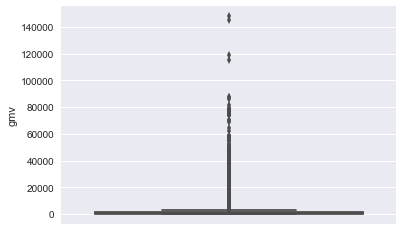

In [137]:
sns.boxplot(x='gmv', data = consumer_data_filtered, orient = 'vertical')

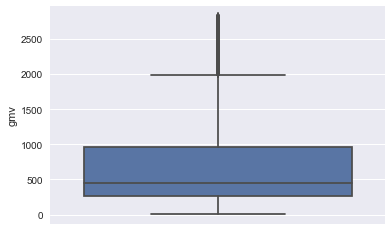

In [138]:
dummy = consumer_data_filtered.copy()
q1 = dummy['gmv'].quantile(0.25)
q3 = dummy['gmv'].quantile(0.75)
iqr = q3 - q1
dummy = dummy[(dummy['gmv'] > q1 - 1.5*iqr) & (dummy['gmv'] < q3 + 1.5*iqr)]

sns.boxplot(x='gmv', data = dummy, orient = 'vertical')

In [139]:
quantile=[0,0.5,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
consumer_data_filtered.gmv.quantile(quantile)
#50% values below 645 - outliers detected

0.00       10.00
0.50      497.00
0.10      199.00
0.15      225.00
0.20      250.00
0.25      282.00
0.30      300.00
0.35      339.00
0.40      383.00
0.45      439.00
0.50      497.00
0.55      579.00
0.60      693.00
0.65      834.00
0.70      999.00
0.75     1299.00
0.80     1605.00
0.85     2024.00
0.90     2599.00
0.95     3850.00
1.00   148050.00
Name: gmv, dtype: float64

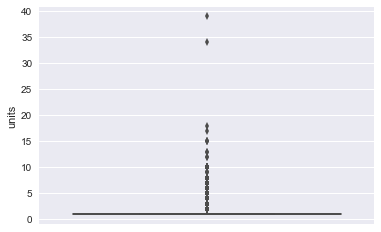

In [140]:
#Units
sns.boxplot(x='units', data = consumer_data_filtered, orient = 'vertical')

In [141]:
consumer_data_filtered.units.quantile(quantile)
#Range varies from 0 to 39 units. 95% of the data contains unit values as 1.

0.00    1.00
0.50    1.00
0.10    1.00
0.15    1.00
0.20    1.00
0.25    1.00
0.30    1.00
0.35    1.00
0.40    1.00
0.45    1.00
0.50    1.00
0.55    1.00
0.60    1.00
0.65    1.00
0.70    1.00
0.75    1.00
0.80    1.00
0.85    1.00
0.90    1.00
0.95    1.00
1.00   39.00
Name: units, dtype: float64

In [142]:
consumer_data_filtered['sla'].describe()

count   431861.00
mean         6.28
std          2.53
min          0.00
25%          5.00
50%          6.00
75%          8.00
max         60.00
Name: sla, dtype: float64

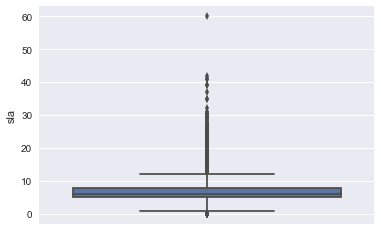

In [143]:
sns.boxplot(x='sla', data = consumer_data_filtered, orient = 'vertical')

In [144]:
consumer_data_filtered.sla.quantile(quantile)

0.00    0.00
0.50    6.00
0.10    3.00
0.15    4.00
0.20    4.00
0.25    5.00
0.30    5.00
0.35    5.00
0.40    5.00
0.45    6.00
0.50    6.00
0.55    6.00
0.60    7.00
0.65    7.00
0.70    7.00
0.75    8.00
0.80    8.00
0.85    9.00
0.90    9.00
0.95   11.00
1.00   60.00
Name: sla, dtype: float64

In [145]:
# Product MRP:
consumer_data_filtered.product_mrp.describe()

count   431861.00
mean      2113.70
std       3355.93
min         99.00
25%        745.00
50%       1100.00
75%       2050.00
max     180000.00
Name: product_mrp, dtype: float64

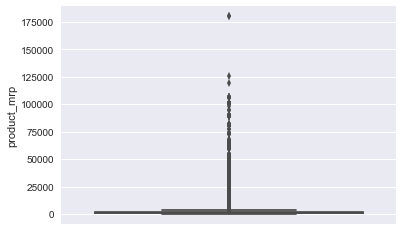

In [146]:
sns.boxplot(x='product_mrp', data = consumer_data_filtered, orient = 'vertical')

In [147]:
consumer_data_filtered.product_mrp.quantile(quantile)

0.00       99.00
0.50     1100.00
0.10      410.00
0.15      500.00
0.20      599.00
0.25      745.00
0.30      800.00
0.35      850.00
0.40      950.00
0.45      999.00
0.50     1100.00
0.55     1299.00
0.60     1499.00
0.65     1799.00
0.70     1999.00
0.75     2050.00
0.80     2990.00
0.85     3500.00
0.90     4570.00
0.95     6199.00
1.00   180000.00
Name: product_mrp, dtype: float64

In [148]:
# Discount Percentage
consumer_data_filtered.discount_percentage.describe()

count   431861.00
mean        46.69
std         23.54
min          0.00
25%         28.09
50%         47.50
75%         63.96
max         98.31
Name: discount_percentage, dtype: float64

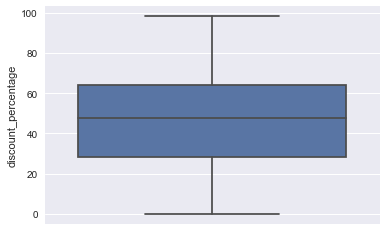

In [149]:
sns.boxplot(x='discount_percentage', data = consumer_data_filtered, orient = 'vertical')

In [150]:
consumer_data_filtered['discount_percentage'].quantile(quantile)

0.00    0.00
0.50   47.50
0.10   15.01
0.15   19.99
0.20   23.67
0.25   28.09
0.30   32.20
0.35   36.01
0.40   40.04
0.45   43.40
0.50   47.50
0.55   50.20
0.60   53.71
0.65   57.09
0.70   59.80
0.75   63.96
0.80   68.60
0.85   75.04
0.90   79.97
0.95   85.73
1.00   98.31
Name: discount_percentage, dtype: float64

In [151]:
# NPS Scores:
consumer_data_filtered['NPS'].describe()

count   431861.00
mean        48.34
std          2.66
min         44.40
25%         46.93
50%         47.31
75%         50.33
max         59.99
Name: NPS, dtype: float64

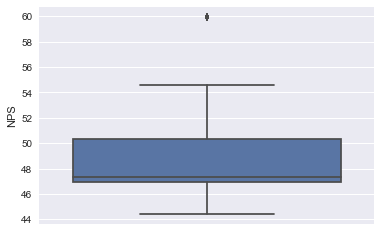

In [152]:
sns.boxplot(x='NPS', data = consumer_data_filtered, orient = 'vertical')

In [153]:
consumer_data_filtered['NPS'].quantile(quantile)

0.00   44.40
0.50   47.31
0.10   44.40
0.15   45.80
0.20   45.80
0.25   46.93
0.30   47.00
0.35   47.09
0.40   47.09
0.45   47.31
0.50   47.31
0.55   47.31
0.60   49.02
0.65   49.02
0.70   50.33
0.75   50.33
0.80   50.52
0.85   50.52
0.90   51.83
0.95   54.60
1.00   59.99
Name: NPS, dtype: float64

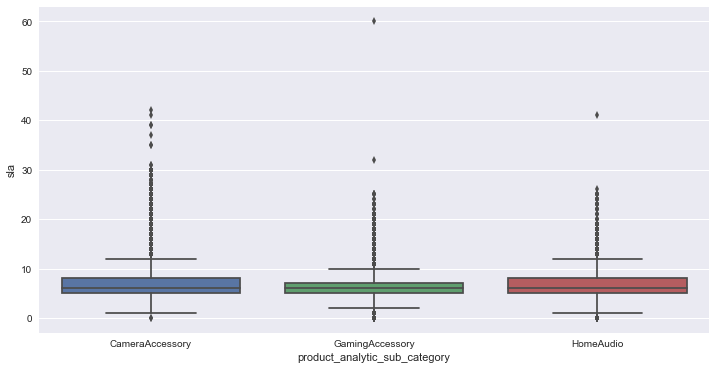

In [154]:
# How is the distribution of SLA for different product sub categories
plt.figure(figsize = (12,6))
b1 = sns.boxplot(data=consumer_data_filtered,x = 'product_analytic_sub_category', y = 'sla')

In [155]:
consumer_data_filtered.sla.mean()

6.275949900546704

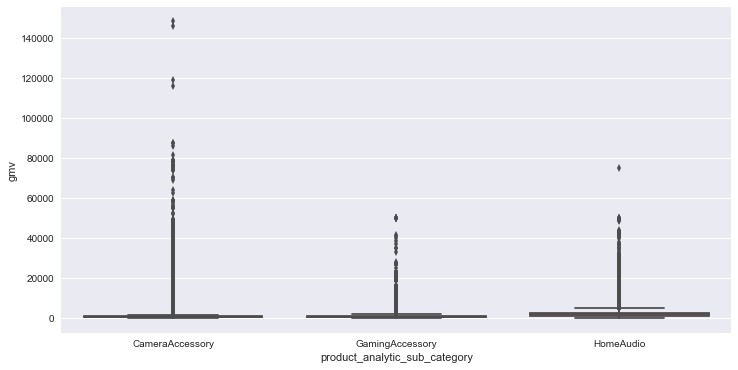

In [156]:
# Distribution of GMV for each product category
plt.figure(figsize = (12,6))
b2 = sns.boxplot(data=consumer_data_filtered,x ='product_analytic_sub_category', y='gmv')

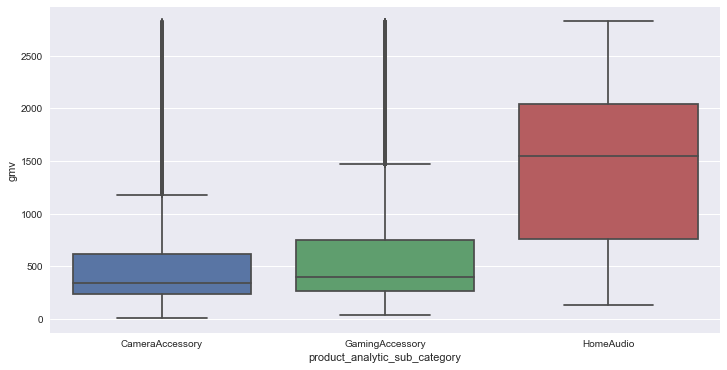

In [157]:
# Distribution of GMV for each product category
plt.figure(figsize = (12,6))
b2 = sns.boxplot(data=dummy,x ='product_analytic_sub_category', y='gmv')

In [158]:
# Mean GMV values for all three sub categories remained the same. We observe a lot of outliers in the CameraAccessory category

In [159]:
d1 = consumer_data_filtered[consumer_data_filtered['product_analytic_sub_category'] == "CameraAccessory"].groupby('week',as_index=False)[['discount_percentage']].mean()
d1['product_analytic_subtype'] = "CameraAccessory"
d1

,week,discount_percentage,product_analytic_subtype
0,1,52.47,CameraAccessory
1,2,44.89,CameraAccessory
2,3,45.42,CameraAccessory
3,4,44.33,CameraAccessory
4,5,43.58,CameraAccessory
5,6,51.79,CameraAccessory
6,10,45.22,CameraAccessory
7,11,47.14,CameraAccessory
8,12,46.15,CameraAccessory
9,13,45.04,CameraAccessory


In [160]:
d2 = consumer_data_filtered[consumer_data_filtered['product_analytic_sub_category'] == "GamingAccessory"].groupby('week',as_index=False)[['discount_percentage']].mean()
d2['product_analytic_subtype'] = "GamingAccessory"
d2

,week,discount_percentage,product_analytic_subtype
0,1,26.08,GamingAccessory
1,2,37.14,GamingAccessory
2,3,41.44,GamingAccessory
3,4,38.12,GamingAccessory
4,5,41.80,GamingAccessory
5,6,62.93,GamingAccessory
6,7,38.60,GamingAccessory
7,8,48.64,GamingAccessory
8,9,41.89,GamingAccessory
9,10,40.06,GamingAccessory


In [161]:
d3 = consumer_data_filtered[consumer_data_filtered['product_analytic_sub_category'] == "HomeAudio"].groupby('week',as_index=False)[['discount_percentage']].mean()
d3['product_analytic_subtype'] = "HomeAudio"
d3

,week,discount_percentage,product_analytic_subtype
0,1,35.94,HomeAudio
1,2,32.79,HomeAudio
2,3,33.35,HomeAudio
3,4,32.99,HomeAudio
4,5,32.69,HomeAudio
5,6,16.13,HomeAudio
6,10,36.95,HomeAudio
7,11,36.50,HomeAudio
8,12,35.87,HomeAudio
9,13,33.56,HomeAudio


#Mean Discount offered by week for CameraAccessory
b3 = sns.catplot(data=d1,x = 'week' , y = 'discount_percentage',kind='point')
# Maximum discount offered in week 33

#Mean Discount offered by week for GamingAccessory
b4 = sns.catplot(data=d2,x = 'week' , y = 'discount_percentage',kind='point')
# Maximum discount offered in the week 32, 42, 52, 60 and so on

#Mean Discount offered by week for Home Audio
b5 = sns.catplot(data=d3,x = 'week' , y = 'discount_percentage',kind='point')
# Reverse trend observed for Home Audio Sub category, lowest discount in the week 32 , highest in 50, 54

# Distribution of discounts offered on different events
e = consumer_data_filtered[consumer_data_filtered['special_sales']==1]
b6 = sns.catplot(data=e, x = 'Date' , y = 'discount_percentage' , kind = 'point')
#Distribution of Discount Percentage by Event Name'


# Comparision of  mean gmv for normal days vs days on which there are holiday promotions
consumer_data_filtered.groupby('special_sales',as_index=False)[['gmv']].mean()
# The average gmv value is higher on the day when holiday promotions are there.

# Consumer sentiment score 
b8 = sns.catplot(data=consumer_data_filtered,x = 'week', y= 'NPS',kind='point')

In [162]:
consumer_data_filtered.head()

,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,...,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,pay_day,Year
5,7,150.00,1,4,CameraAccessory,400,3,1,62.50,150.00,...,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0,2015
6,7,339.00,1,1,CameraAccessory,1490,1,0,77.25,339.00,...,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0,2015
10,7,189.00,1,6,CameraAccessory,250,3,3,24.40,189.00,...,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0,2015
21,7,205.00,1,12,CameraAccessory,270,2,10,24.07,205.00,...,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0,2015
23,7,889.00,1,1,CameraAccessory,1699,1,0,47.68,889.00,...,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0,2015


In [163]:
consumer_data_filtered.columns

Index(['Month', 'gmv', 'units', 'sla', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'sla_diff',
       'discount_percentage', 'gmv_per_unit', 'order_payment_type_Prepaid',
       'Date', 'week', 'special_sales', 'NPS', 'Stock Index',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other', 'pay_day',
       'Year'],
      dtype='object')

# Outlier Treatment

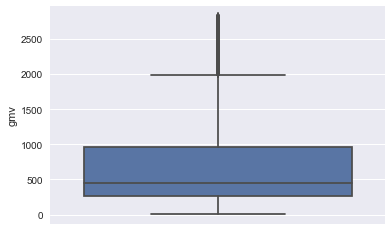

In [164]:
#Treating the gmv values
q1 = consumer_data_filtered['gmv'].quantile(0.25)
q3 = consumer_data_filtered['gmv'].quantile(0.75)
iqr = q3 - q1
consumer_data_filtered = consumer_data_filtered[(consumer_data_filtered['gmv'] > q1 - 1.5*iqr) & (consumer_data_filtered['gmv'] < q3 + 1.5*iqr)]

sns.boxplot(x='gmv', data = consumer_data_filtered, orient = 'vertical')

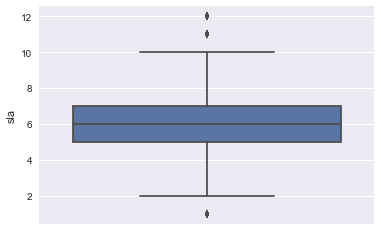

In [165]:
#treating the sla values
q1 = consumer_data_filtered['sla'].quantile(0.25)
q3 = consumer_data_filtered['sla'].quantile(0.75)
iqr = q3 - q1
consumer_data_filtered = consumer_data_filtered[(consumer_data_filtered['sla'] > q1 - 1.5*iqr) & (consumer_data_filtered['sla'] < q3 + 1.5*iqr)]

sns.boxplot(x='sla', data = consumer_data_filtered, orient = 'vertical')

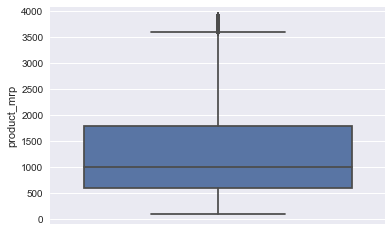

In [166]:
#treating the product_mrp values
q1 = consumer_data_filtered['product_mrp'].quantile(0.25)
q3 = consumer_data_filtered['product_mrp'].quantile(0.75)
iqr = q3 - q1
consumer_data_filtered = consumer_data_filtered[(consumer_data_filtered['product_mrp'] > q1 - 1.5*iqr) & (consumer_data_filtered['product_mrp'] < q3 + 1.5*iqr)]

sns.boxplot(x='product_mrp', data = consumer_data_filtered, orient = 'vertical')

In [167]:
numeric_cols = consumer_data_filtered.select_dtypes(exclude = ['object', 'datetime64[ns]']).columns
numeric_cols

Index(['Month', 'gmv', 'units', 'sla', 'product_mrp',
       'product_procurement_sla', 'sla_diff', 'discount_percentage',
       'gmv_per_unit', 'order_payment_type_Prepaid', 'week', 'special_sales',
       'NPS', 'Stock Index', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'pay_day', 'Year'],
      dtype='object')

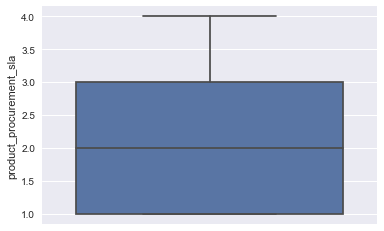

In [168]:
#treating the product_procurement_sla values
q1 = consumer_data_filtered['product_procurement_sla'].quantile(0.25)
q3 = consumer_data_filtered['product_procurement_sla'].quantile(0.75)
iqr = q3 - q1
consumer_data_filtered = consumer_data_filtered[(consumer_data_filtered['product_procurement_sla'] > q1 - 1.5*iqr) & (consumer_data_filtered['product_procurement_sla'] < q3 + 1.5*iqr)]

sns.boxplot(x='product_procurement_sla', data = consumer_data_filtered, orient = 'vertical')

In [169]:
# Group the data frame by week and product_analytic_sub_category and extract a number of stats from each group
weekly_data=consumer_data_filtered.groupby(['week', 'product_analytic_sub_category'],as_index=False).agg(
    {
         'gmv':sum,
         'units':sum,
         'sla':"mean",
         'product_mrp':"mean",
         'product_procurement_sla':"mean",
         'sla_diff': "mean",
         'discount_percentage':"mean",    
         'gmv_per_unit': "mean", 
         'order_payment_type_Prepaid':sum,
         'special_sales': sum,
         'NPS': "mean",
         'Stock Index':"mean",
         'Total Investment':"mean",
         'TV':"mean",
         'Digital':"mean",
         'Sponsorship':"mean",
         'Content Marketing':"mean",
         'Online marketing':"mean",
         'Affiliates':"mean",
         'SEM':"mean",
         'Radio':"mean",
         'Other':"mean",
         'pay_day':sum,
             }
)

weekly_data.head()

,week,product_analytic_sub_category,gmv,units,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,...,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,pay_day
0,1,CameraAccessory,4067.00,10,4.00,1047.70,2.00,2.00,52.47,406.70,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0
1,1,GamingAccessory,7758.00,9,5.56,1200.67,1.89,3.67,32.49,862.00,...,0.01,0.12,0.35,0.00,0.06,0.03,0.24,0.00,0.00,2
2,1,HomeAudio,12581.00,8,6.12,2769.38,2.25,3.88,43.49,1572.62,...,0.01,0.17,0.50,0.00,0.09,0.04,0.34,0.00,0.00,1
3,2,CameraAccessory,1003905.00,1780,6.86,1128.61,2.04,4.82,46.50,571.62,...,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0
4,2,GamingAccessory,763139.00,1326,6.54,1027.67,2.19,4.35,40.22,583.01,...,0.01,0.12,0.35,0.00,0.06,0.03,0.24,0.00,0.00,0


In [170]:
weekly_data.shape

(153, 25)

In [171]:
weekly_data['pay_day'] = np.where(weekly_data['pay_day'] > 0, 1, 0)
weekly_data['special_sales'] = np.where(weekly_data['special_sales'] > 0, 1, 0)

In [172]:
#checking total sales on special_sales week vs non-special_sales week

In [173]:
ss1 = weekly_data[weekly_data['special_sales'] == 1]

In [174]:
ss1['gmv'].sum()

62735451.453578144

In [175]:
ss2 = weekly_data[weekly_data['special_sales'] == 0]

In [176]:
ss2['gmv'].sum()

131541361.60802883

In [177]:
62735451.453578144 / 131541361.60802883

0.4769256657120462

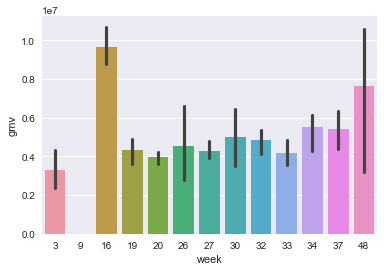

In [178]:
sns.barplot(x = 'week', y = 'gmv', data = ss1, estimator = np.sum)

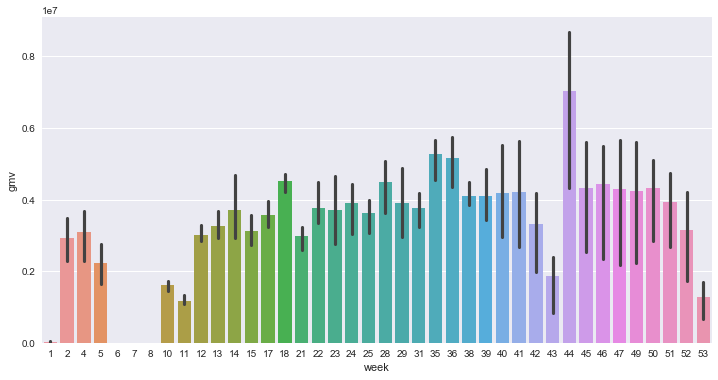

In [179]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'week', y = 'gmv', data = ss2, estimator = np.sum)

In [180]:
CameraAccessory_weekly = weekly_data[weekly_data['product_analytic_sub_category'] == 'CameraAccessory']
GamingAccessory_weekly = weekly_data[weekly_data['product_analytic_sub_category'] == 'GamingAccessory']
HomeAudio_weekly = weekly_data[weekly_data['product_analytic_sub_category'] == 'HomeAudio']

# Renaming columns (adding prefix avg and total)
cols = weekly_data.columns[~weekly_data.columns.isin(['week','product_analytic_sub_category','sla','product_mrp','discount_percentage','gmv_per_unit','NPSScore','stock_index'])]
weekly_data.rename(columns = dict(zip(cols, cols + '_total')), inplace=True)

cols = weekly_data.columns[weekly_data.columns.isin(['sla','product_mrp','discount_percentage','gmv_per_unit','NPSScore','stock_index'])]
weekly_data.rename(columns = dict(zip(cols, cols + '_avg')), inplace=True)


# Adstock 

In [181]:
# Assigning Adstock Rates for each Adv channel 
# we have considered these rates based on secondary research 
adstock_rate = [0.8, 0.5, 0.5, 0.5, 0.6, 0.1, 0.2, 0.5, 0.1] 
# These rates are use for EDA only

In [182]:
import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf

def adstock(df):
    df['TV_adstock'] = tsa.filters.filtertools.recursive_filter(df['TV'], adstock_rate[0])
    df['Digital_adstock'] = tsa.filters.filtertools.recursive_filter(df['Digital'], adstock_rate[1])
    df['Sponsorship_adstock'] = tsa.filters.filtertools.recursive_filter(df['Sponsorship'], adstock_rate[2])
    df['content_marketing_adstock'] = tsa.filters.filtertools.recursive_filter(df['Content Marketing'], adstock_rate[3])
    df['online_marketing_adstock'] = tsa.filters.filtertools.recursive_filter(df['Online marketing'], adstock_rate[4])
    df['affiliates_adstock'] = tsa.filters.filtertools.recursive_filter(df['Affiliates'], adstock_rate[5])
    df['SEM_adstock'] = tsa.filters.filtertools.recursive_filter(df['SEM'], adstock_rate[6])
    df['Radio_adstock'] = tsa.filters.filtertools.recursive_filter(df['Radio'], adstock_rate[7])
    df['Other_adstock'] = tsa.filters.filtertools.recursive_filter(df['Other'], adstock_rate[8])
    return 0

In [183]:
adstock(CameraAccessory_weekly)
CameraAccessory_weekly.head()

,week,product_analytic_sub_category,gmv,units,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,...,pay_day,TV_adstock,Digital_adstock,Sponsorship_adstock,content_marketing_adstock,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,1,CameraAccessory,4067.00,10,4.00,1047.70,2.00,2.00,52.47,406.70,...,0,0.02,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00
3,2,CameraAccessory,1003905.00,1780,6.86,1128.61,2.04,4.82,46.50,571.62,...,0,0.03,0.28,0.82,0.00,0.16,0.04,0.44,0.00,0.00
6,3,CameraAccessory,1097503.00,1990,6.54,1186.39,2.04,4.50,47.76,558.00,...,1,0.04,0.33,0.95,0.00,0.19,0.04,0.46,0.00,0.00
9,4,CameraAccessory,1092921.00,1991,6.56,1150.04,2.07,4.50,45.40,553.12,...,0,0.05,0.35,1.02,0.00,0.21,0.04,0.46,0.00,0.00
12,5,CameraAccessory,747530.00,1343,6.48,1144.97,2.10,4.38,45.26,564.68,...,0,0.05,0.36,1.05,0.00,0.22,0.04,0.46,0.00,0.00


In [184]:
adstock(GamingAccessory_weekly)
GamingAccessory_weekly.head()

,week,product_analytic_sub_category,gmv,units,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,...,pay_day,TV_adstock,Digital_adstock,Sponsorship_adstock,content_marketing_adstock,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
1,1,GamingAccessory,7758.00,9,5.56,1200.67,1.89,3.67,32.49,862.00,...,1,0.01,0.12,0.35,0.00,0.06,0.03,0.24,0.00,0.00
4,2,GamingAccessory,763139.00,1326,6.54,1027.67,2.19,4.35,40.22,583.01,...,0,0.02,0.18,0.52,0.00,0.10,0.03,0.28,0.00,0.00
7,3,GamingAccessory,783978.36,1650,5.87,855.40,2.28,3.59,46.22,494.62,...,1,0.02,0.21,0.61,0.00,0.12,0.03,0.29,0.00,0.00
10,4,GamingAccessory,765301.00,1303,6.00,1002.70,2.09,3.91,39.75,599.28,...,0,0.03,0.22,0.65,0.00,0.14,0.03,0.29,0.00,0.00
13,5,GamingAccessory,551707.00,894,6.30,1047.57,2.14,4.16,41.45,630.73,...,0,0.03,0.23,0.67,0.00,0.14,0.03,0.29,0.00,0.00


In [185]:
adstock(HomeAudio_weekly)
HomeAudio_weekly.head()

,week,product_analytic_sub_category,gmv,units,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,...,pay_day,TV_adstock,Digital_adstock,Sponsorship_adstock,content_marketing_adstock,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
2,1,HomeAudio,12581.00,8,6.12,2769.38,2.25,3.88,43.49,1572.62,...,1,0.01,0.17,0.50,0.00,0.09,0.04,0.34,0.00,0.00
5,2,HomeAudio,1165624.00,909,7.49,1988.23,1.91,5.58,32.63,1284.11,...,0,0.03,0.26,0.75,0.00,0.14,0.04,0.41,0.00,0.00
8,3,HomeAudio,1441028.00,1081,7.18,2063.21,1.75,5.43,32.43,1337.00,...,1,0.04,0.30,0.87,0.00,0.17,0.04,0.42,0.00,0.00
11,4,HomeAudio,1230725.00,983,7.18,1942.15,1.73,5.45,31.34,1255.98,...,0,0.04,0.32,0.93,0.00,0.19,0.04,0.42,0.00,0.00
14,5,HomeAudio,916000.00,710,7.30,1990.46,1.73,5.57,30.22,1291.96,...,0,0.05,0.33,0.97,0.00,0.21,0.04,0.42,0.00,0.00


In [186]:
HomeAudio_weekly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2 to 152
Data columns (total 34 columns):
week                             50 non-null int64
product_analytic_sub_category    50 non-null object
gmv                              50 non-null float64
units                            50 non-null int64
sla                              50 non-null float64
product_mrp                      50 non-null float64
product_procurement_sla          50 non-null float64
sla_diff                         50 non-null float64
discount_percentage              50 non-null float64
gmv_per_unit                     50 non-null float64
order_payment_type_Prepaid       50 non-null float64
special_sales                    50 non-null int32
NPS                              50 non-null float64
Stock Index                      50 non-null float64
Total Investment                 50 non-null float64
TV                               50 non-null float64
Digital                          50 non-null float64
Sp

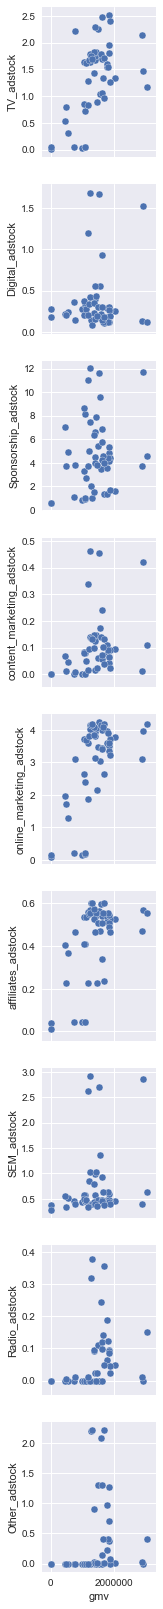

In [187]:
# Analyzing GMV against each channel adstock
g1 = sns.pairplot(CameraAccessory_weekly, y_vars=["TV_adstock", "Digital_adstock","Sponsorship_adstock","content_marketing_adstock",
                                       "online_marketing_adstock","affiliates_adstock","SEM_adstock","Radio_adstock","Other_adstock"]
                  ,x_vars=["gmv"])

a=weekly_data.columns.get_loc("Total Investment_total")
b=weekly_data.columns.get_loc("Other_total")
print(a,b)

weekly_data.iloc[:,a:(b+1)]=weekly_data.iloc[:,a:(b+1)]*10000000

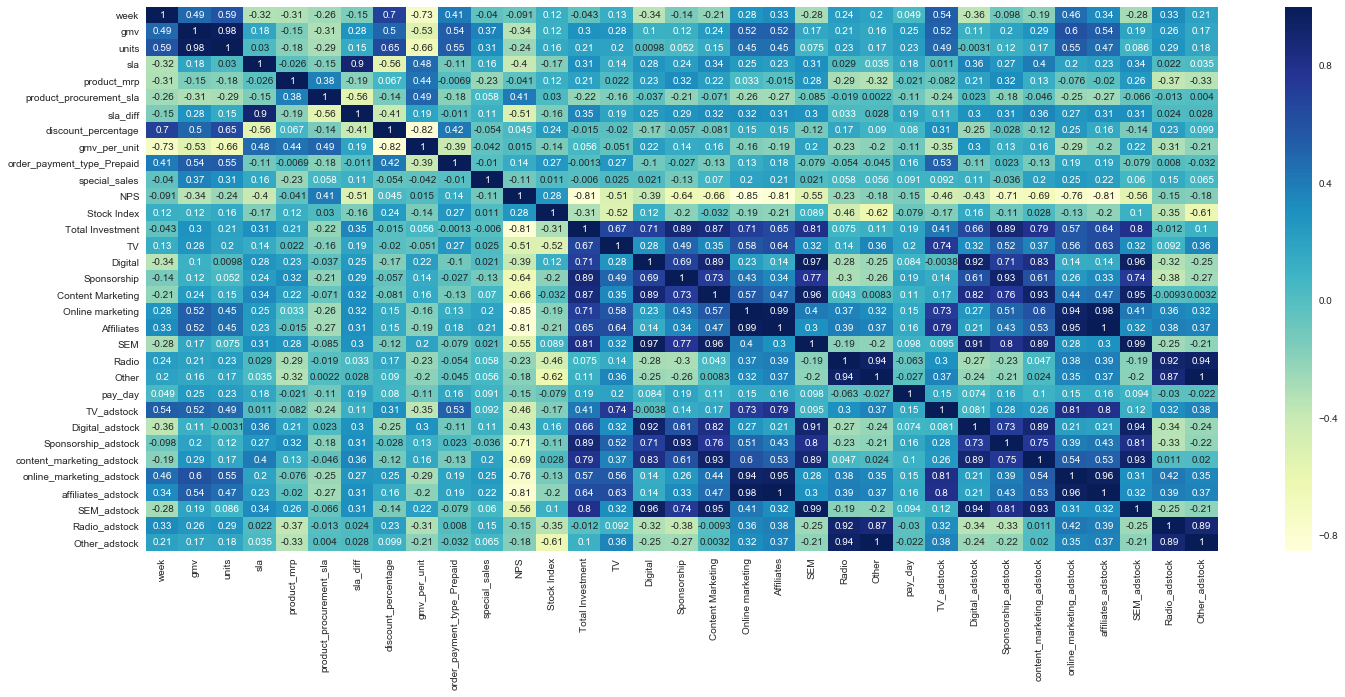

In [188]:
plt.figure(figsize=(24,10))
sns.heatmap(CameraAccessory_weekly.corr(),cmap='YlGnBu',annot=True)
plt.show()

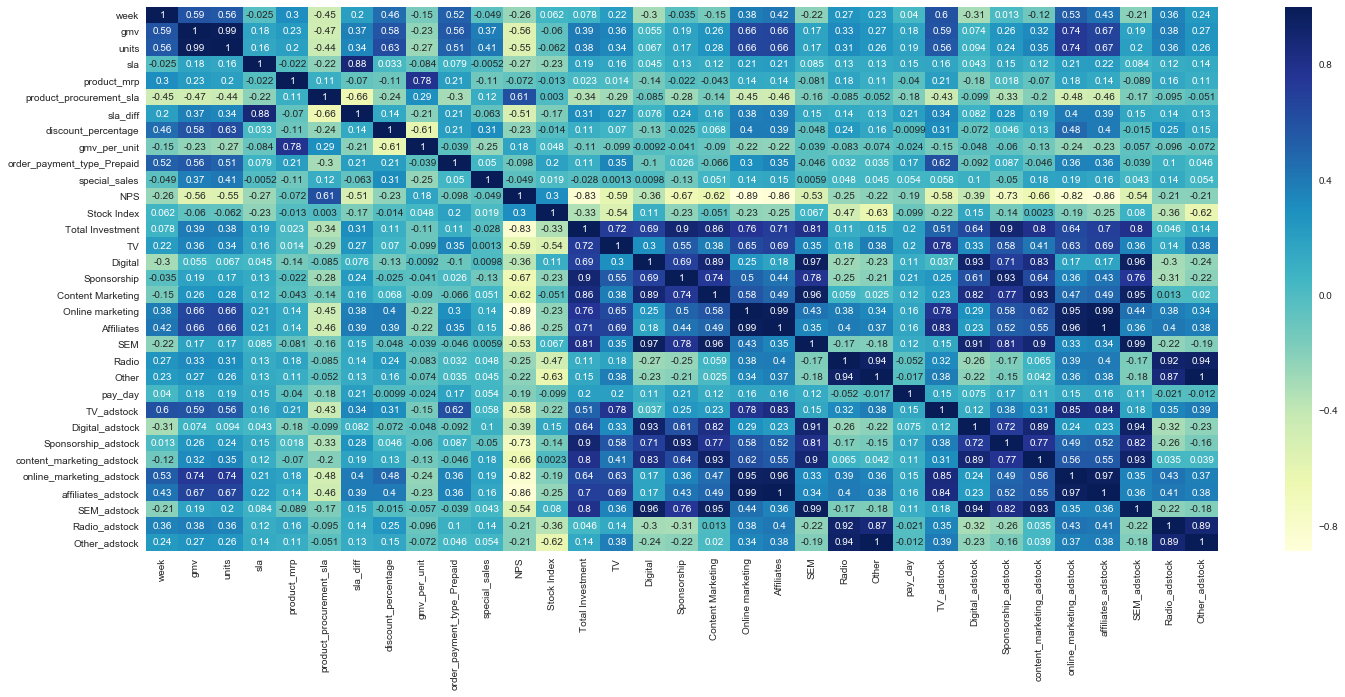

In [189]:
plt.figure(figsize=(24,10))
sns.heatmap(GamingAccessory_weekly.corr(),cmap='YlGnBu',annot=True)
plt.show()

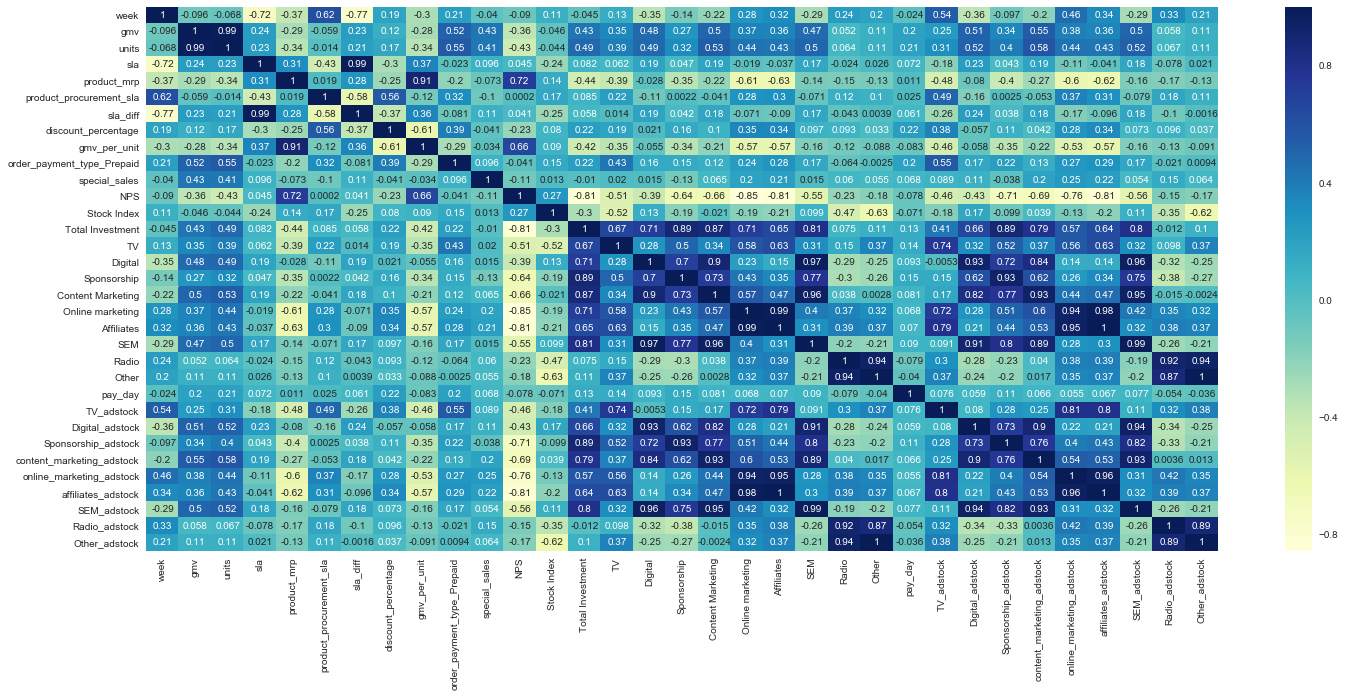

In [190]:
plt.figure(figsize=(24,10))
sns.heatmap(HomeAudio_weekly.corr(),cmap='YlGnBu',annot=True)
plt.show()

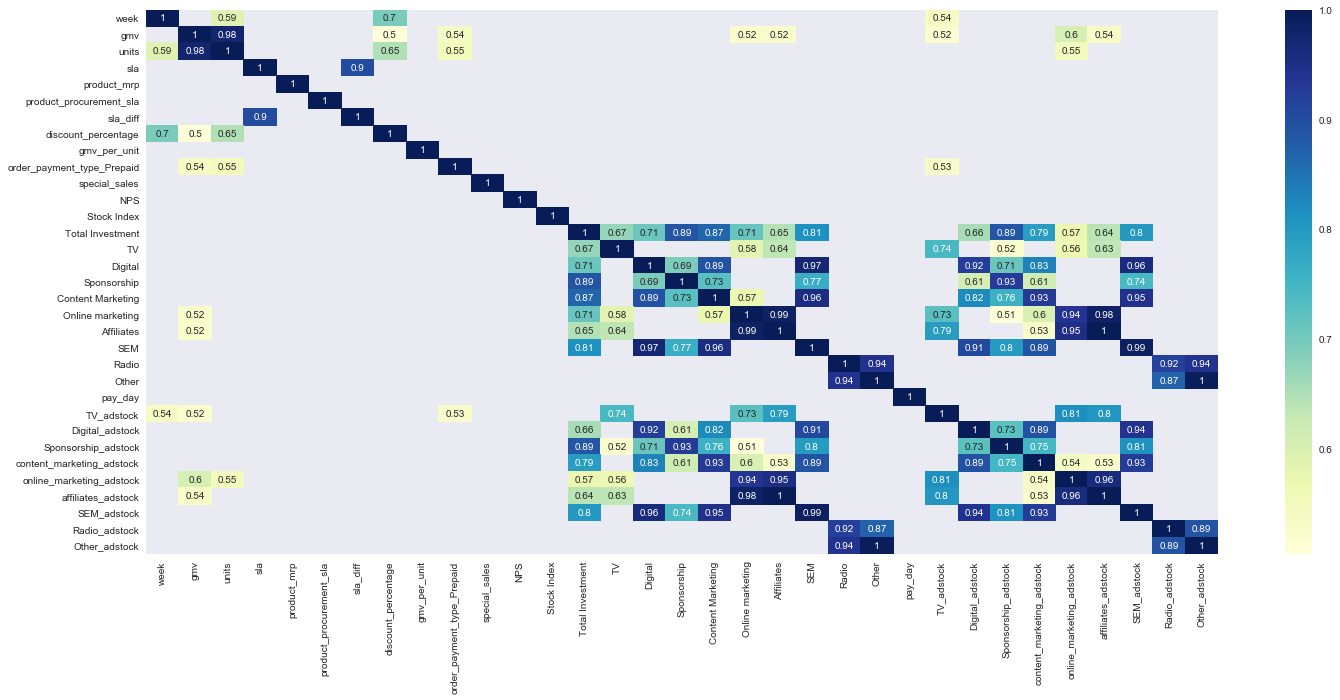

In [191]:
plt.figure(figsize=(24,10))
corr = CameraAccessory_weekly.corr()
sns.heatmap(corr[corr > 0.5] ,cmap='YlGnBu',annot=True)
plt.show()

In [192]:
#dropping units - its very obvious that more the units more is the gmv
#removing few other highly correlated variables
CameraAccessory_weekly.drop(['units'], axis = 1, inplace = True)

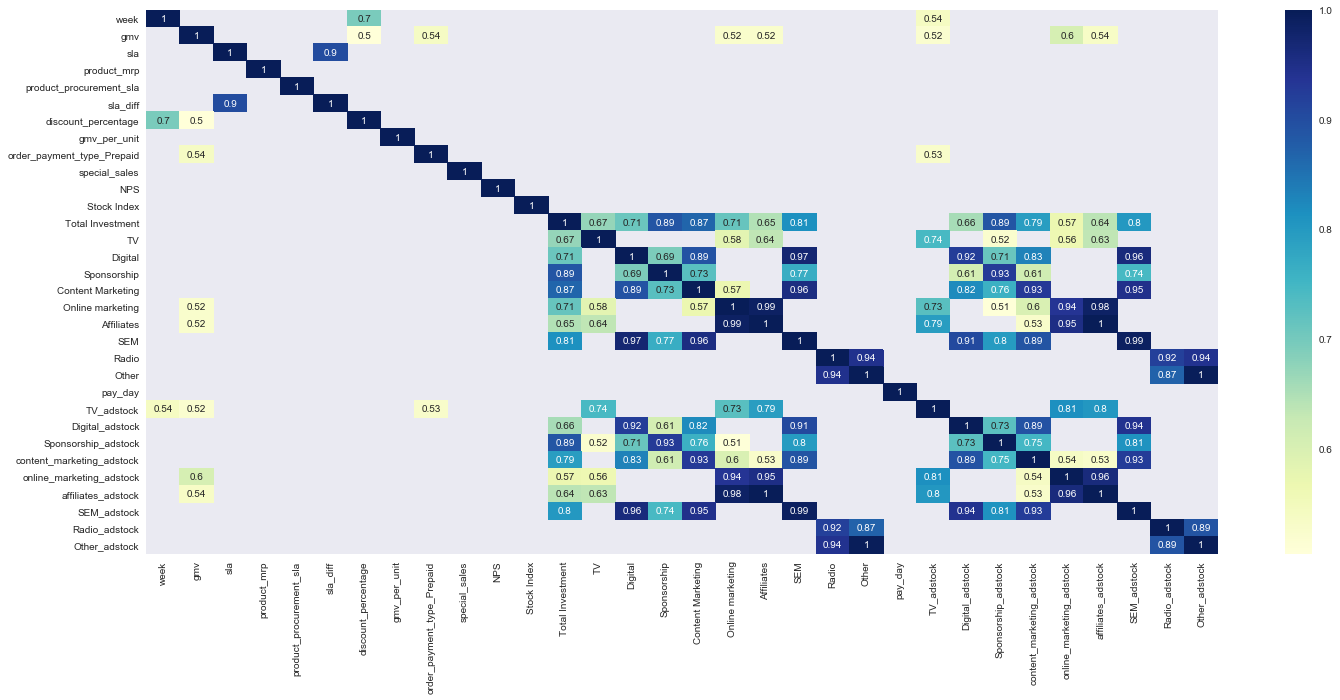

In [193]:
plt.figure(figsize=(24,10))
corr = CameraAccessory_weekly.corr()
sns.heatmap(corr[corr > 0.5] ,cmap='YlGnBu',annot=True)
plt.show()

In [194]:
GamingAccessory_weekly.drop(['units'], axis = 1, inplace = True)
HomeAudio_weekly.drop(['units'], axis = 1, inplace = True)

# Climate Data

## 2015 Climate Data

In [195]:
climate_2015 = pd.read_csv("ONTARIO-2015.csv", header = 22)

In [196]:
climate_2015

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.00,NaN,-8.50,NaN,-4.30,...,0.00,NaN,0.00,NaN,0.00,NaN,nan,nan,nan,nan
1,2015-01-02,2015,1,2,†,3.00,NaN,-3.00,NaN,0.00,...,0.00,NaN,0.00,NaN,0.00,NaN,nan,nan,nan,nan
2,2015-01-03,2015,1,3,†,2.50,NaN,-4.00,NaN,-0.80,...,0.00,NaN,24.00,NaN,0.00,NaN,nan,nan,nan,nan
3,2015-01-04,2015,1,4,†,2.50,NaN,0.00,NaN,1.30,...,1.00,NaN,1.00,NaN,0.00,NaN,nan,nan,nan,nan
4,2015-01-05,2015,1,5,†,-10.00,NaN,-13.50,NaN,-11.80,...,3.00,NaN,3.00,NaN,1.00,NaN,nan,nan,nan,nan
5,2015-01-06,2015,1,6,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
6,2015-01-07,2015,1,7,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
7,2015-01-08,2015,1,8,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
8,2015-01-09,2015,1,9,†,-7.00,NaN,-14.00,NaN,-10.50,...,0.00,NaN,0.00,NaN,4.00,NaN,nan,nan,nan,nan
9,2015-01-10,2015,1,10,†,-2.50,NaN,nan,M,nan,...,0.00,NaN,0.00,NaN,0.00,NaN,nan,nan,nan,nan


In [197]:
climate_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [198]:
climate_2015.shape

(365, 27)

In [199]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
Date/Time                    365 non-null object
Year                         365 non-null int64
Month                        365 non-null int64
Day                          365 non-null int64
Data Quality                 229 non-null object
Max Temp (°C)                216 non-null float64
Max Temp Flag                13 non-null object
Min Temp (°C)                190 non-null float64
Min Temp Flag                39 non-null object
Mean Temp (°C)               190 non-null float64
Mean Temp Flag               39 non-null object
Heat Deg Days (°C)           190 non-null float64
Heat Deg Days Flag           39 non-null object
Cool Deg Days (°C)           190 non-null float64
Cool Deg Days Flag           39 non-null object
Total Rain (mm)              229 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              229 non-null float64
Total Snow Flag 

In [200]:
climate_2015['Date/Time'] = pd.to_datetime(climate_2015['Date/Time'])

In [201]:
climate_2015['Date/Time'].dtype

dtype('<M8[ns]')

In [202]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
Date/Time                    365 non-null datetime64[ns]
Year                         365 non-null int64
Month                        365 non-null int64
Day                          365 non-null int64
Data Quality                 229 non-null object
Max Temp (°C)                216 non-null float64
Max Temp Flag                13 non-null object
Min Temp (°C)                190 non-null float64
Min Temp Flag                39 non-null object
Mean Temp (°C)               190 non-null float64
Mean Temp Flag               39 non-null object
Heat Deg Days (°C)           190 non-null float64
Heat Deg Days Flag           39 non-null object
Cool Deg Days (°C)           190 non-null float64
Cool Deg Days Flag           39 non-null object
Total Rain (mm)              229 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              229 non-null float64
Total Sn

In [203]:
c1 = climate_2015

In [204]:
c1.rename(columns = {'Date/Time': 'Date'}, inplace = True)

In [205]:
#we only need climate data from July 2015
c1 = c1[c1['Date'] >= pd.to_datetime('2015-07-01')]

In [206]:
c1.shape

(184, 27)

In [207]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 181 to 364
Data columns (total 27 columns):
Date                         184 non-null datetime64[ns]
Year                         184 non-null int64
Month                        184 non-null int64
Day                          184 non-null int64
Data Quality                 115 non-null object
Max Temp (°C)                109 non-null float64
Max Temp Flag                6 non-null object
Min Temp (°C)                98 non-null float64
Min Temp Flag                17 non-null object
Mean Temp (°C)               98 non-null float64
Mean Temp Flag               17 non-null object
Heat Deg Days (°C)           98 non-null float64
Heat Deg Days Flag           17 non-null object
Cool Deg Days (°C)           98 non-null float64
Cool Deg Days Flag           17 non-null object
Total Rain (mm)              115 non-null float64
Total Rain Flag              5 non-null object
Total Snow (cm)              115 non-null float64
Total Snow 

In [208]:
round((c1.isnull().sum() / len(c1.index)) *100, 2)
#below is a series

Date                          0.00
Year                          0.00
Month                         0.00
Day                           0.00
Data Quality                 37.50
Max Temp (°C)                40.76
Max Temp Flag                96.74
Min Temp (°C)                46.74
Min Temp Flag                90.76
Mean Temp (°C)               46.74
Mean Temp Flag               90.76
Heat Deg Days (°C)           46.74
Heat Deg Days Flag           90.76
Cool Deg Days (°C)           46.74
Cool Deg Days Flag           90.76
Total Rain (mm)              37.50
Total Rain Flag              97.28
Total Snow (cm)              37.50
Total Snow Flag              99.46
Total Precip (mm)            37.50
Total Precip Flag            97.28
Snow on Grnd (cm)            37.50
Snow on Grnd Flag            98.91
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [209]:
c1['Mean Temp Flag'].value_counts()

M    17
Name: Mean Temp Flag, dtype: int64

In [210]:
#dropping columns with high percentage of null values
#storing the series in a variable
temp = round((c1.isnull().sum() / len(c1.index)) *100, 2)
type(temp)

pandas.core.series.Series

In [211]:
#finding the columns having null percentage greater than 50
temp[temp.values > 50]

Max Temp Flag                96.74
Min Temp Flag                90.76
Mean Temp Flag               90.76
Heat Deg Days Flag           90.76
Cool Deg Days Flag           90.76
Total Rain Flag              97.28
Total Snow Flag              99.46
Total Precip Flag            97.28
Snow on Grnd Flag            98.91
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [212]:
cols = temp[temp.values > 50].index
cols

Index(['Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag',
       'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain Flag',
       'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [213]:
c1.drop(cols, axis=1, inplace=True)
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 181 to 364
Data columns (total 14 columns):
Date                  184 non-null datetime64[ns]
Year                  184 non-null int64
Month                 184 non-null int64
Day                   184 non-null int64
Data Quality          115 non-null object
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 21.6+ KB


In [214]:
c1['Data Quality'].value_counts()

†    115
Name: Data Quality, dtype: int64

In [215]:
#dropping the column Data Quality
c1.drop(['Data Quality'], axis=1, inplace=True)

In [216]:
c1

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
181,2015-07-01,2015,7,1,24.50,17.00,20.80,0.00,2.80,0.00,0.00,0.00,0.00
182,2015-07-02,2015,7,2,24.00,14.00,19.00,0.00,1.00,0.00,0.00,0.00,0.00
183,2015-07-03,2015,7,3,25.00,10.00,17.50,0.50,0.00,0.00,0.00,0.00,0.00
184,2015-07-04,2015,7,4,26.00,11.00,18.50,0.00,0.50,0.00,0.00,0.00,0.00
185,2015-07-05,2015,7,5,28.00,14.00,21.00,0.00,3.00,0.00,0.00,0.00,0.00
186,2015-07-06,2015,7,6,nan,nan,nan,nan,nan,nan,nan,nan,nan
187,2015-07-07,2015,7,7,26.00,18.00,22.00,0.00,4.00,8.60,0.00,8.60,0.00
188,2015-07-08,2015,7,8,20.00,12.50,16.30,1.70,0.00,14.40,0.00,14.40,0.00
189,2015-07-09,2015,7,9,24.00,17.00,20.50,0.00,2.50,3.50,0.00,3.50,0.00
190,2015-07-10,2015,7,10,26.00,13.00,19.50,0.00,1.50,0.00,0.00,0.00,0.00


Upon visual inspection it is evident that weather data for few rows are completely missing

In [217]:
c1.dropna(thresh = 5, inplace = True)

In [218]:
print(c1.shape, "\n\n")
c1.info()

(115, 13) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 181 to 362
Data columns (total 13 columns):
Date                  115 non-null datetime64[ns]
Year                  115 non-null int64
Month                 115 non-null int64
Day                   115 non-null int64
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 12.6 KB


In [219]:
c1['Max Temp (°C)']

181   24.50
182   24.00
183   25.00
184   26.00
185   28.00
187   26.00
188   20.00
189   24.00
190   26.00
191   28.00
192   25.00
194   29.00
195   23.50
196   25.00
197   30.00
198   32.00
199   33.00
200   30.00
202   27.00
203   29.00
204   31.00
205   31.50
206   30.00
207   32.00
208   33.50
210   30.50
211   31.00
212   29.00
213   33.50
215   28.50
       ... 
298   15.50
300   16.00
306   22.00
307   23.00
308   22.00
309   18.00
310   12.50
312   14.50
315   10.50
318   17.00
321   16.00
322   14.50
324    2.00
325    1.50
330   12.00
332    4.50
335    7.50
337    6.50
340    3.00
344   13.00
345   16.00
346   15.00
350   10.50
352    3.00
353    5.50
355   11.50
356   15.50
358     nan
359    9.50
362    6.50
Name: Max Temp (°C), Length: 115, dtype: float64

In [220]:
c1['Max Temp (°C)'].max()

33.5

Text(0,0.5,'Temperature')

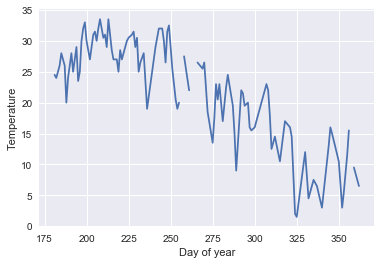

In [221]:
plt.plot(c1['Max Temp (°C)'])
plt.xlabel('Day of year')
plt.ylabel('Temperature')

Text(0,0.5,'Count')

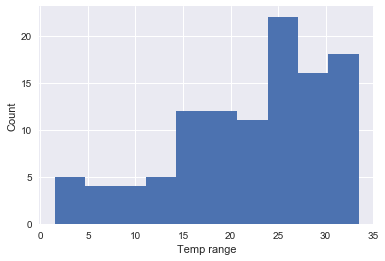

In [222]:
plt.hist(c1['Max Temp (°C)'], range = (c1['Max Temp (°C)'].min(), c1['Max Temp (°C)'].max()))
plt.xlabel('Temp range')
plt.ylabel('Count')

Text(0,0.5,'Count')

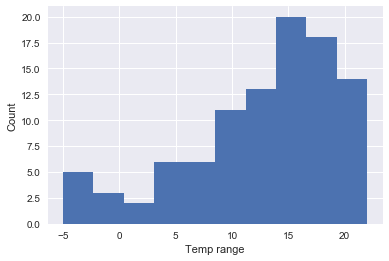

In [223]:
plt.hist(c1['Min Temp (°C)'], range = (c1['Min Temp (°C)'].min(), c1['Min Temp (°C)'].max()), histtype = 'bar')
plt.xlabel('Temp range')
plt.ylabel('Count')

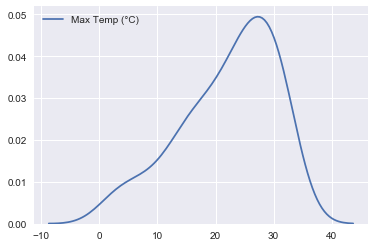

In [224]:
sns.kdeplot(c1['Max Temp (°C)'])

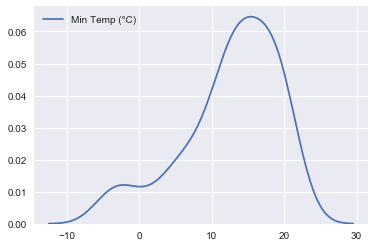

In [225]:
sns.kdeplot(c1['Min Temp (°C)'])

In [226]:
c1['Heat Deg Days (°C)']

181    0.00
182    0.00
183    0.50
184    0.00
185    0.00
187    0.00
188    1.70
189    0.00
190    0.00
191    0.00
192    0.00
194    0.00
195    0.00
196    0.00
197    0.00
198    0.00
199    0.00
200    0.00
202    0.00
203    0.00
204     nan
205    0.00
206    0.00
207    0.00
208    0.00
210    0.00
211    0.00
212    0.00
213    0.00
215    0.00
       ... 
298    9.20
300    5.00
306    3.70
307    4.00
308    1.50
309    3.00
310    8.20
312   11.50
315    9.00
318    7.00
321    4.00
322    7.20
324   17.20
325   19.30
330   10.20
332     nan
335   16.20
337     nan
340   17.70
344    8.70
345    6.50
346    5.00
350     nan
352   18.50
353   17.70
355   10.20
356    9.70
358     nan
359     nan
362   15.70
Name: Heat Deg Days (°C), Length: 115, dtype: float64

(array([66.,  7.,  6.,  3.,  5.,  4.,  0.,  0.,  3.,  4.]),
 array([ 0.  ,  1.93,  3.86,  5.79,  7.72,  9.65, 11.58, 13.51, 15.44,
        17.37, 19.3 ]),
 <a list of 10 Patch objects>)

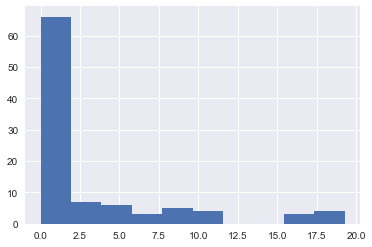

In [227]:
plt.hist(c1['Heat Deg Days (°C)'].dropna())

(array([47.,  4.,  4., 10.,  5.,  6.,  7.,  8.,  5.,  2.]),
 array([0.  , 0.93, 1.86, 2.79, 3.72, 4.65, 5.58, 6.51, 7.44, 8.37, 9.3 ]),
 <a list of 10 Patch objects>)

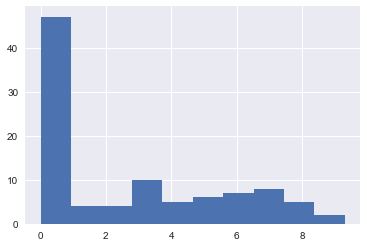

In [228]:
plt.hist(c1['Cool Deg Days (°C)'].dropna())

In [229]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 181 to 362
Data columns (total 13 columns):
Date                  115 non-null datetime64[ns]
Year                  115 non-null int64
Month                 115 non-null int64
Day                   115 non-null int64
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 12.6 KB


(array([ 5.,  2.,  1.,  8.,  5., 11., 14., 19., 17., 16.]),
 array([-1.3 ,  1.56,  4.42,  7.28, 10.14, 13.  , 15.86, 18.72, 21.58,
        24.44, 27.3 ]),
 <a list of 10 Patch objects>)

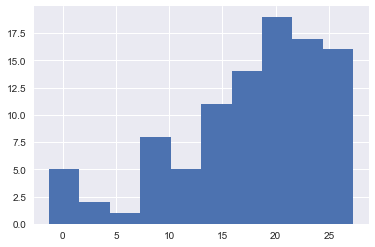

In [230]:
plt.hist(c1['Mean Temp (°C)'].dropna())

In [231]:
#creating week column
c1['week'] = c1['Date'].dt.week

In [232]:
#group by week
c1_grp = c1.groupby('week')

In [233]:
c1.aggregate(['mean', 'min', 'max'])

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
min,2015-07-01,2015.00,7.00,1.00,1.50,-5.00,-1.30,0.00,0.00,0.00,0.00,0.00,0.00,27.00
max,2015-12-29,2015.00,12.00,31.00,33.50,22.00,27.30,19.30,9.30,57.20,10.00,57.20,7.00,53.00
mean,NaT,2015.00,9.12,15.32,22.09,12.57,17.63,2.96,2.59,2.56,0.09,2.65,0.06,38.19


In [234]:
#dropping unnecessary coulmns and aggregating on remaining columns
cols = c1.drop(['Date', 'Year', 'Month', 'Day'], axis=1).columns
climate_2015 = c1_grp[cols].mean()

In [235]:
climate_2015

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
week,,,,,,,,,,
27,25.50,13.20,19.36,0.10,1.46,0.00,0.00,0.00,0.00,27
28,24.83,15.33,20.10,0.28,2.38,4.42,0.00,4.42,0.00,28
29,28.75,17.58,23.18,0.00,5.18,1.40,0.00,1.40,0.00,29
30,29.75,16.60,23.06,0.00,5.06,0.90,0.00,0.90,0.00,30
31,31.58,17.50,24.57,0.00,6.57,4.63,0.00,4.63,0.00,31
32,27.20,16.00,21.65,0.00,3.65,0.28,0.00,0.28,0.00,32
33,29.62,18.25,23.95,0.00,5.95,2.90,0.00,2.90,0.00,33
34,28.42,18.42,23.45,0.00,5.45,5.13,0.00,5.13,0.00,34
35,24.00,16.50,20.25,0.75,3.00,0.00,0.00,0.00,0.00,35


In [236]:
climate_2015.shape

(27, 10)

## 2016 Climate Data

In [237]:
climate_2016 = pd.read_csv("ONTARIO-2016.csv", header = 22)

In [238]:
climate_2016

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
1,2016-01-02,2016,1,2,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
2,2016-01-03,2016,1,3,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
3,2016-01-04,2016,1,4,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
4,2016-01-05,2016,1,5,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
5,2016-01-06,2016,1,6,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
6,2016-01-07,2016,1,7,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
7,2016-01-08,2016,1,8,†,7.00,NaN,-14.00,NaN,-3.50,...,0.00,NaN,9.00,NaN,0.00,NaN,nan,nan,nan,nan
8,2016-01-09,2016,1,9,†,11.00,NaN,3.00,NaN,7.00,...,0.00,T,14.60,NaN,0.00,NaN,nan,nan,nan,nan
9,2016-01-10,2016,1,10,†,-1.50,NaN,-5.00,NaN,-3.30,...,7.00,NaN,7.00,NaN,0.00,T,nan,nan,nan,nan


In [239]:
climate_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [240]:
climate_2016.shape

(366, 27)

In [241]:
climate_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date/Time                    366 non-null object
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Data Quality                 227 non-null object
Max Temp (°C)                226 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                219 non-null float64
Min Temp Flag                8 non-null object
Mean Temp (°C)               219 non-null float64
Mean Temp Flag               8 non-null object
Heat Deg Days (°C)           219 non-null float64
Heat Deg Days Flag           8 non-null object
Cool Deg Days (°C)           219 non-null float64
Cool Deg Days Flag           8 non-null object
Total Rain (mm)              227 non-null float64
Total Rain Flag              3 non-null object
Total Snow (cm)              227 non-null float64
Total Snow Flag      

In [242]:
climate_2016['Date/Time'] = pd.to_datetime(climate_2016['Date/Time'], errors = 'coerce')

In [243]:
climate_2016['Date/Time'].dtype

dtype('<M8[ns]')

In [244]:
climate_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date/Time                    366 non-null datetime64[ns]
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Data Quality                 227 non-null object
Max Temp (°C)                226 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                219 non-null float64
Min Temp Flag                8 non-null object
Mean Temp (°C)               219 non-null float64
Mean Temp Flag               8 non-null object
Heat Deg Days (°C)           219 non-null float64
Heat Deg Days Flag           8 non-null object
Cool Deg Days (°C)           219 non-null float64
Cool Deg Days Flag           8 non-null object
Total Rain (mm)              227 non-null float64
Total Rain Flag              3 non-null object
Total Snow (cm)              227 non-null float64
Total Snow Fl

In [245]:
c2 = climate_2016

In [246]:
c2.rename(columns = {'Date/Time': 'Date'}, inplace = True)

In [247]:
#we only need climate data from July 2015
c2 = c2[c2['Date'] <= pd.to_datetime('2016-06-30')]

In [248]:
c2.shape

(182, 27)

In [249]:
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 27 columns):
Date                         182 non-null datetime64[ns]
Year                         182 non-null int64
Month                        182 non-null int64
Day                          182 non-null int64
Data Quality                 100 non-null object
Max Temp (°C)                99 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                93 non-null float64
Min Temp Flag                7 non-null object
Mean Temp (°C)               93 non-null float64
Mean Temp Flag               7 non-null object
Heat Deg Days (°C)           93 non-null float64
Heat Deg Days Flag           7 non-null object
Cool Deg Days (°C)           93 non-null float64
Cool Deg Days Flag           7 non-null object
Total Rain (mm)              100 non-null float64
Total Rain Flag              2 non-null object
Total Snow (cm)              100 non-null float64
Total Snow Flag   

In [250]:
round((c2.isnull().sum() / len(c2.index)) *100, 2)
#below is a series

Date                          0.00
Year                          0.00
Month                         0.00
Day                           0.00
Data Quality                 45.05
Max Temp (°C)                45.60
Max Temp Flag                99.45
Min Temp (°C)                48.90
Min Temp Flag                96.15
Mean Temp (°C)               48.90
Mean Temp Flag               96.15
Heat Deg Days (°C)           48.90
Heat Deg Days Flag           96.15
Cool Deg Days (°C)           48.90
Cool Deg Days Flag           96.15
Total Rain (mm)              45.05
Total Rain Flag              98.90
Total Snow (cm)              45.05
Total Snow Flag              97.25
Total Precip (mm)            45.05
Total Precip Flag            96.70
Snow on Grnd (cm)            45.05
Snow on Grnd Flag            97.80
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [251]:
c2['Mean Temp Flag'].value_counts()

M    7
Name: Mean Temp Flag, dtype: int64

In [252]:
#dropping columns with high percentage of null values
#storing the series in a variable
temp = round((c2.isnull().sum() / len(c2.index)) *100, 2)
type(temp)

pandas.core.series.Series

In [253]:
#finding the columns having null percentage greater than 50
temp[temp.values > 50]

Max Temp Flag                99.45
Min Temp Flag                96.15
Mean Temp Flag               96.15
Heat Deg Days Flag           96.15
Cool Deg Days Flag           96.15
Total Rain Flag              98.90
Total Snow Flag              97.25
Total Precip Flag            96.70
Snow on Grnd Flag            97.80
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [254]:
cols = temp[temp.values > 50].index
cols

Index(['Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag',
       'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain Flag',
       'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [255]:
c2.drop(cols, axis=1, inplace=True)
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 14 columns):
Date                  182 non-null datetime64[ns]
Year                  182 non-null int64
Month                 182 non-null int64
Day                   182 non-null int64
Data Quality          100 non-null object
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 21.3+ KB


In [256]:
c2['Data Quality'].value_counts()

†    100
Name: Data Quality, dtype: int64

In [257]:
#dropping the column Data Quality
c2.drop(['Data Quality'], axis=1, inplace=True)

In [258]:
c2

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2016-01-01,2016,1,1,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2016-01-02,2016,1,2,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2016-01-03,2016,1,3,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2016-01-04,2016,1,4,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2016-01-05,2016,1,5,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,2016-01-06,2016,1,6,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,2016-01-07,2016,1,7,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,2016-01-08,2016,1,8,7.00,-14.00,-3.50,21.50,0.00,9.00,0.00,9.00,0.00
8,2016-01-09,2016,1,9,11.00,3.00,7.00,11.00,0.00,14.60,0.00,14.60,0.00
9,2016-01-10,2016,1,10,-1.50,-5.00,-3.30,21.30,0.00,0.00,7.00,7.00,0.00


Upon visual inspection it is evident that weather data for few rows are completely missing

In [259]:
c2.dropna(thresh = 5, inplace = True)

In [260]:
print(c2.shape, "\n\n")
c2.info()

(100, 13) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 7 to 181
Data columns (total 13 columns):
Date                  100 non-null datetime64[ns]
Year                  100 non-null int64
Month                 100 non-null int64
Day                   100 non-null int64
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 10.9 KB


In [261]:
c2['Max Temp (°C)']

7      7.00
8     11.00
9     -1.50
11    -5.00
13     2.50
14     4.50
20    -3.00
23     3.00
24     5.50
25     6.00
32     9.50
33    13.00
34     1.50
37     8.50
38     5.00
43    -8.50
44    -5.00
48     6.50
49    17.50
50    17.50
54     1.00
55     1.00
59    10.50
60    10.50
63     2.00
65     7.50
66    18.00
68    20.00
72    11.00
74    15.00
       ... 
134   11.50
135   11.00
136   21.00
138   18.50
144   29.00
145   30.00
146   30.00
147   30.00
148   31.00
149   31.00
153   30.00
155   26.50
156   25.00
157   29.00
159   21.50
160   25.00
161   29.00
162   35.00
163   26.50
164   24.00
167   27.50
169   30.50
170   33.00
171   34.50
173   30.50
175   29.00
176   30.50
177   34.00
178   34.50
181   30.00
Name: Max Temp (°C), Length: 100, dtype: float64

In [262]:
c2['Max Temp (°C)'].max()

35.0

Text(0,0.5,'Temperature')

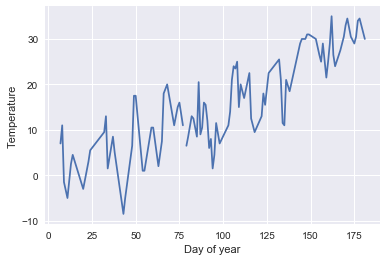

In [263]:
plt.plot(c2['Max Temp (°C)'])
plt.xlabel('Day of year')
plt.ylabel('Temperature')

Text(0,0.5,'Count')

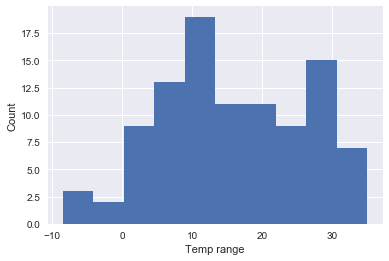

In [264]:
plt.hist(c2['Max Temp (°C)'].dropna())
plt.xlabel('Temp range')
plt.ylabel('Count')

Text(0,0.5,'Count')

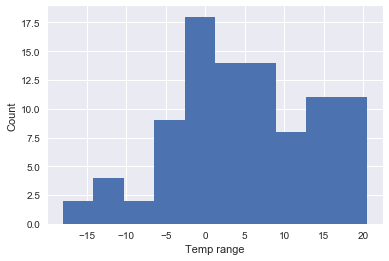

In [265]:
plt.hist(c2['Min Temp (°C)'].dropna())
plt.xlabel('Temp range')
plt.ylabel('Count')

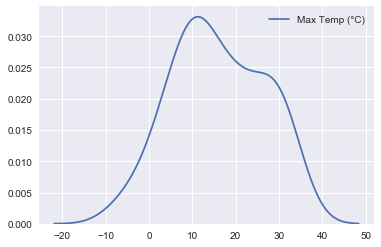

In [266]:
sns.kdeplot(c2['Max Temp (°C)'])

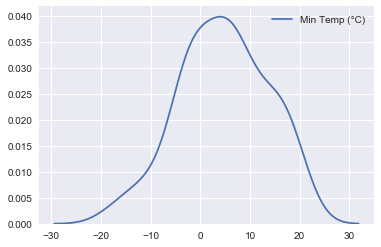

In [267]:
sns.kdeplot(c2['Min Temp (°C)'])

In [268]:
c2['Heat Deg Days (°C)']

7     21.50
8     11.00
9     21.30
11    26.50
13    22.00
14    16.70
20      nan
23      nan
24    19.80
25      nan
32    16.00
33    10.70
34    17.70
37      nan
38    16.00
43    30.30
44    29.50
48    20.80
49    11.00
50     6.70
54    18.00
55    19.30
59    13.20
60    15.20
63    19.00
65      nan
66    10.00
68     3.50
72    10.00
74     7.00
       ... 
134    8.20
135   11.20
136    5.50
138    5.70
144    0.00
145    0.00
146    0.00
147    0.00
148    0.00
149    0.00
153    0.00
155    0.00
156    0.00
157    0.00
159    2.70
160    0.70
161    0.00
162    0.00
163    0.00
164    1.70
167    0.00
169    0.00
170    0.00
171    0.00
173    0.00
175    0.00
176    0.00
177    0.00
178    0.00
181    0.00
Name: Heat Deg Days (°C), Length: 100, dtype: float64

(array([29., 12., 12., 12.,  6., 10.,  6.,  3.,  1.,  2.]),
 array([ 0.  ,  3.03,  6.06,  9.09, 12.12, 15.15, 18.18, 21.21, 24.24,
        27.27, 30.3 ]),
 <a list of 10 Patch objects>)

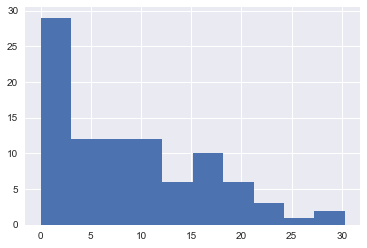

In [269]:
plt.hist(c2['Heat Deg Days (°C)'].dropna())

(array([70.,  1.,  1.,  5.,  5.,  1.,  4.,  2.,  1.,  3.]),
 array([0.  , 0.95, 1.9 , 2.85, 3.8 , 4.75, 5.7 , 6.65, 7.6 , 8.55, 9.5 ]),
 <a list of 10 Patch objects>)

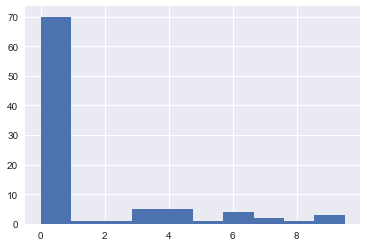

In [270]:
plt.hist(c2['Cool Deg Days (°C)'].dropna())

In [271]:
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 7 to 181
Data columns (total 13 columns):
Date                  100 non-null datetime64[ns]
Year                  100 non-null int64
Month                 100 non-null int64
Day                   100 non-null int64
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 10.9 KB


(array([ 3.,  0.,  8., 12., 14., 15., 14.,  5., 12., 10.]),
 array([-12.3 ,  -8.32,  -4.34,  -0.36,   3.62,   7.6 ,  11.58,  15.56,
         19.54,  23.52,  27.5 ]),
 <a list of 10 Patch objects>)

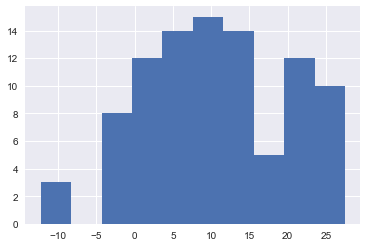

In [272]:
plt.hist(c2['Mean Temp (°C)'].dropna())

In [273]:
#creating week column
c2['week'] = c2['Date'].dt.week

In [274]:
c2.describe()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
count,100.00,100.00,100.00,99.00,93.00,93.00,93.00,93.00,100.00,100.00,100.00,100.00,100.00
mean,2016.00,3.80,15.70,15.97,4.61,10.67,8.61,1.28,2.61,0.34,2.95,0.55,14.36
std,0.00,1.61,8.66,10.55,8.86,9.37,7.69,2.51,6.08,1.32,6.34,2.06,7.03
min,2016.00,1.00,1.00,-8.50,-18.00,-12.30,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2016.00,3.00,8.00,8.50,-2.00,4.30,0.00,0.00,0.00,0.00,0.00,0.00,9.00
50%,2016.00,4.00,16.00,15.00,5.00,10.80,7.20,0.00,0.00,0.00,0.00,0.00,14.00
75%,2016.00,5.00,24.00,25.00,11.00,18.30,13.70,0.30,1.55,0.00,3.20,0.00,21.00
max,2016.00,6.00,31.00,35.00,20.50,27.50,30.30,9.50,32.60,7.00,32.60,12.00,26.00


In [275]:
#group by week
c2_grp = c2.groupby('week')

In [276]:
c2.aggregate(['mean', 'min', 'max'])

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
min,2016-01-08,2016.00,1.00,1.00,-8.50,-18.00,-12.30,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,2016-06-30,2016.00,6.00,31.00,35.00,20.50,27.50,30.30,9.50,32.60,7.00,32.60,12.00,26.00
mean,NaT,2016.00,3.80,15.70,15.97,4.61,10.67,8.61,1.28,2.61,0.34,2.95,0.55,14.36


In [277]:
#dropping unnecessary coulmns and aggregating on remaining columns
cols = c2.drop(['Date', 'Year', 'Month', 'Day'], axis=1).columns
climate_2016 = c2_grp[cols].mean()

In [278]:
climate_2016

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
week,,,,,,,,,,
1,5.50,-5.33,0.07,17.93,0.00,7.87,2.33,10.20,0.00,1
2,0.67,-8.17,-3.73,21.73,0.00,2.53,0.00,2.53,10.33,2
3,0.00,nan,nan,nan,nan,0.00,0.00,0.00,0.00,3
4,5.75,-9.00,-1.80,19.80,0.00,0.00,0.00,0.00,0.00,4
5,8.12,-1.67,3.20,14.80,0.00,2.65,0.00,2.65,0.00,5
6,-2.83,-11.67,-7.27,25.27,0.00,0.00,2.67,2.67,2.00,6
7,13.83,-3.50,5.17,12.83,0.00,0.00,0.00,0.00,1.33,7
8,1.00,-2.25,-0.65,18.65,0.00,12.70,3.00,15.70,3.00,8
9,7.62,-3.33,2.20,15.80,0.00,0.75,1.75,2.50,2.00,9


Week 3 has nan values. Replacing the nan values for week 55 with mean of values from week 2 and week 4

In [279]:
climate_2016.loc[3]

Max Temp (°C)        0.00
Min Temp (°C)         nan
Mean Temp (°C)        nan
Heat Deg Days (°C)    nan
Cool Deg Days (°C)    nan
Total Rain (mm)      0.00
Total Snow (cm)      0.00
Total Precip (mm)    0.00
Snow on Grnd (cm)    0.00
week                 3.00
Name: 3, dtype: float64

In [280]:
climate_2016.loc[3, 'Min Temp (°C)'] = climate_2016.loc[2, 'Min Temp (°C)'] + climate_2016.loc[4, 'Min Temp (°C)']
climate_2016.loc[3, 'Min Temp (°C)']

-17.166666666666664

In [281]:
climate_2016.loc[3, 'Mean Temp (°C)'] = climate_2016.loc[2, 'Mean Temp (°C)'] + climate_2016.loc[4, 'Mean Temp (°C)']
climate_2016.loc[3, 'Heat Deg Days (°C)'] = climate_2016.loc[2, 'Heat Deg Days (°C)'] + climate_2016.loc[4, 'Heat Deg Days (°C)']
climate_2016.loc[3, 'Cool Deg Days (°C)'] = climate_2016.loc[2, 'Cool Deg Days (°C)'] + climate_2016.loc[4, 'Cool Deg Days (°C)']

## Merging 2015 and 2016 data

In [282]:
climate_merge = pd.concat([climate_2015, climate_2016])

In [283]:
climate_merge

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
week,,,,,,,,,,
27,25.50,13.20,19.36,0.10,1.46,0.00,0.00,0.00,0.00,27
28,24.83,15.33,20.10,0.28,2.38,4.42,0.00,4.42,0.00,28
29,28.75,17.58,23.18,0.00,5.18,1.40,0.00,1.40,0.00,29
30,29.75,16.60,23.06,0.00,5.06,0.90,0.00,0.90,0.00,30
31,31.58,17.50,24.57,0.00,6.57,4.63,0.00,4.63,0.00,31
32,27.20,16.00,21.65,0.00,3.65,0.28,0.00,0.28,0.00,32
33,29.62,18.25,23.95,0.00,5.95,2.90,0.00,2.90,0.00,33
34,28.42,18.42,23.45,0.00,5.45,5.13,0.00,5.13,0.00,34
35,24.00,16.50,20.25,0.75,3.00,0.00,0.00,0.00,0.00,35


In [284]:
# July 2015 should have week 1 and June 2016 should have last week i.e. 53rd week for continuation in analysis
climate_merge['week'] = np.where((climate_merge['week'] >= 27) & (climate_merge['week'] <= 53), 
                                 climate_merge['week'] - 26, climate_merge['week'] + 27)

In [285]:
climate_merge.reset_index(drop = True, inplace = True)

In [286]:
climate_merge

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
0,25.50,13.20,19.36,0.10,1.46,0.00,0.00,0.00,0.00,1
1,24.83,15.33,20.10,0.28,2.38,4.42,0.00,4.42,0.00,2
2,28.75,17.58,23.18,0.00,5.18,1.40,0.00,1.40,0.00,3
3,29.75,16.60,23.06,0.00,5.06,0.90,0.00,0.90,0.00,4
4,31.58,17.50,24.57,0.00,6.57,4.63,0.00,4.63,0.00,5
5,27.20,16.00,21.65,0.00,3.65,0.28,0.00,0.28,0.00,6
6,29.62,18.25,23.95,0.00,5.95,2.90,0.00,2.90,0.00,7
7,28.42,18.42,23.45,0.00,5.45,5.13,0.00,5.13,0.00,8
8,24.00,16.50,20.25,0.75,3.00,0.00,0.00,0.00,0.00,9
9,30.42,18.70,24.46,0.00,6.46,10.10,0.00,10.10,0.00,10


In [287]:
climate_merge.isnull().sum()

Max Temp (°C)         0
Min Temp (°C)         0
Mean Temp (°C)        0
Heat Deg Days (°C)    0
Cool Deg Days (°C)    0
Total Rain (mm)       0
Total Snow (cm)       0
Total Precip (mm)     0
Snow on Grnd (cm)     0
week                  0
dtype: int64

In [288]:
climate_merge.describe()

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,17.45,6.62,12.19,7.71,1.55,2.60,0.25,2.85,0.39,27.00
std,9.66,9.11,9.13,8.53,2.26,3.23,0.74,3.50,1.52,15.44
min,-2.83,-17.17,-7.27,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,8.50,-1.20,5.72,0.10,0.00,0.28,0.00,0.30,0.00,14.00
50%,17.60,6.00,12.40,5.60,0.00,1.10,0.00,1.72,0.00,27.00
75%,26.00,15.33,20.55,12.28,3.00,4.20,0.00,4.25,0.00,40.00
max,32.25,18.70,24.57,41.53,6.57,12.80,3.00,15.70,10.33,53.00


In [289]:
climate_merge.shape

(53, 10)

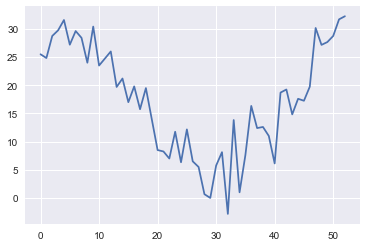

In [290]:
plt.plot(climate_merge['Max Temp (°C)'])

Text(0,0.5,'Weekly Mean Temperature')

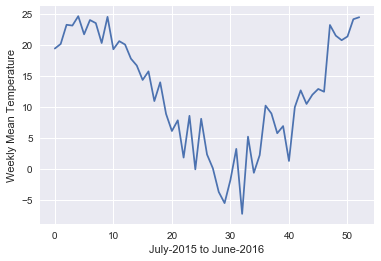

In [291]:
plt.plot(climate_merge['Mean Temp (°C)'])
plt.xlabel('July-2015 to June-2016')
plt.ylabel('Weekly Mean Temperature')

In [292]:
climate_merge.set_index(['week'], inplace = True)

In [293]:
climate_merge.describe()

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,17.45,6.62,12.19,7.71,1.55,2.60,0.25,2.85,0.39
std,9.66,9.11,9.13,8.53,2.26,3.23,0.74,3.50,1.52
min,-2.83,-17.17,-7.27,0.00,0.00,0.00,0.00,0.00,0.00
25%,8.50,-1.20,5.72,0.10,0.00,0.28,0.00,0.30,0.00
50%,17.60,6.00,12.40,5.60,0.00,1.10,0.00,1.72,0.00
75%,26.00,15.33,20.55,12.28,3.00,4.20,0.00,4.25,0.00
max,32.25,18.70,24.57,41.53,6.57,12.80,3.00,15.70,10.33


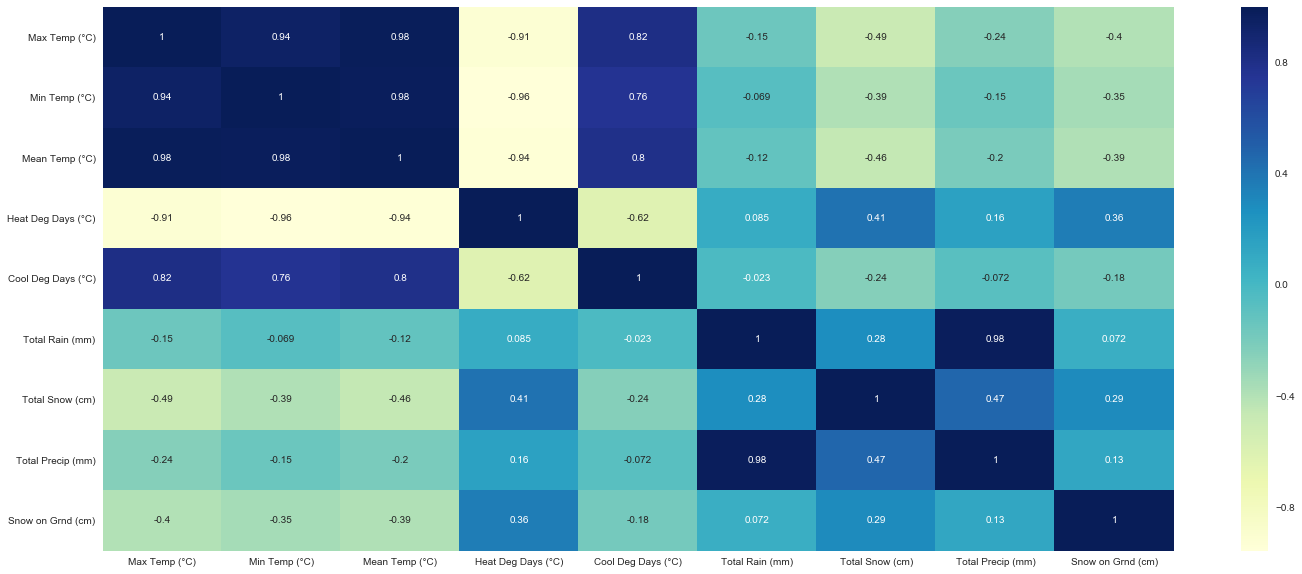

In [294]:
plt.figure(figsize=(24,10))
sns.heatmap(climate_merge.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [295]:
climate_merge.drop(['Total Precip (mm)', 'Cool Deg Days (°C)', 'Max Temp (°C)', 'Min Temp (°C)'], axis = 1, inplace = True)

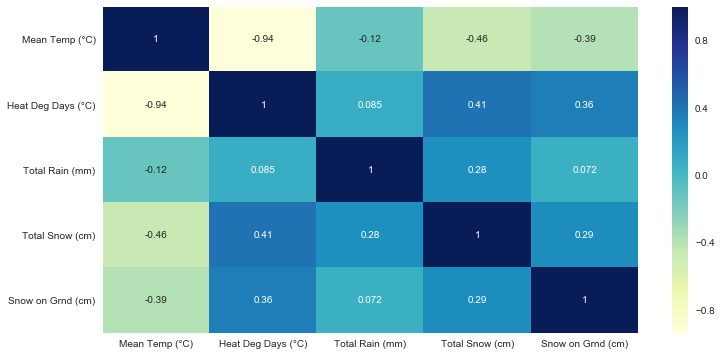

In [296]:
plt.figure(figsize=(12,6))
sns.heatmap(climate_merge.corr(),cmap='YlGnBu',annot=True)
plt.show()

## Combining climate data

In [297]:
CameraAccessory_weekly = CameraAccessory_weekly.merge(climate_merge, how = 'left', left_on = 'week', right_index = True)
CameraAccessory_weekly

,week,product_analytic_sub_category,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,...,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
0,1,CameraAccessory,4067.00,4.00,1047.70,2.00,2.00,52.47,406.70,10.00,...,0.10,0.04,0.37,0.00,0.00,19.36,0.10,0.00,0.00,0.00
3,2,CameraAccessory,1003905.00,6.86,1128.61,2.04,4.82,46.50,571.62,515.00,...,0.16,0.04,0.44,0.00,0.00,20.10,0.28,4.42,0.00,0.00
6,3,CameraAccessory,1097503.00,6.54,1186.39,2.04,4.50,47.76,558.00,593.00,...,0.19,0.04,0.46,0.00,0.00,23.18,0.00,1.40,0.00,0.00
9,4,CameraAccessory,1092921.00,6.56,1150.04,2.07,4.50,45.40,553.12,551.00,...,0.21,0.04,0.46,0.00,0.00,23.06,0.00,0.90,0.00,0.00
12,5,CameraAccessory,747530.00,6.48,1144.97,2.10,4.38,45.26,564.68,349.00,...,0.22,0.04,0.46,0.00,0.00,24.57,0.00,4.63,0.00,0.00
15,6,CameraAccessory,699.00,5.00,1450.00,4.00,1.00,51.79,699.00,0.00,...,0.14,0.01,0.28,0.00,0.00,21.65,0.00,0.28,0.00,0.00
21,10,CameraAccessory,557495.00,6.31,1145.41,2.07,4.25,45.91,561.35,245.00,...,1.28,0.37,0.51,0.00,0.00,24.46,0.00,10.10,0.00,0.00
24,11,CameraAccessory,447470.00,6.20,1232.03,2.08,4.12,48.88,566.71,220.00,...,1.97,0.41,0.56,0.00,0.00,19.24,1.28,0.96,0.00,0.00
27,12,CameraAccessory,1096477.00,6.64,1163.49,2.10,4.53,46.01,564.21,465.00,...,2.38,0.41,0.57,0.00,0.00,20.55,0.00,0.55,0.00,0.00
30,13,CameraAccessory,1061658.00,6.64,1200.07,2.13,4.51,46.07,580.65,430.00,...,2.63,0.41,0.57,0.00,0.00,20.00,0.00,0.00,0.00,0.00


In [298]:
GamingAccessory_weekly = GamingAccessory_weekly.merge(climate_merge, how = 'left', left_on = 'week', right_index = True)
GamingAccessory_weekly

,week,product_analytic_sub_category,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,...,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
1,1,GamingAccessory,7758.00,5.56,1200.67,1.89,3.67,32.49,862.00,9.00,...,0.06,0.03,0.24,0.00,0.00,19.36,0.10,0.00,0.00,0.00
4,2,GamingAccessory,763139.00,6.54,1027.67,2.19,4.35,40.22,583.01,305.00,...,0.10,0.03,0.28,0.00,0.00,20.10,0.28,4.42,0.00,0.00
7,3,GamingAccessory,783978.36,5.87,855.40,2.28,3.59,46.22,494.62,328.00,...,0.12,0.03,0.29,0.00,0.00,23.18,0.00,1.40,0.00,0.00
10,4,GamingAccessory,765301.00,6.00,1002.70,2.09,3.91,39.75,599.28,247.00,...,0.14,0.03,0.29,0.00,0.00,23.06,0.00,0.90,0.00,0.00
13,5,GamingAccessory,551707.00,6.30,1047.57,2.14,4.16,41.45,630.73,135.00,...,0.14,0.03,0.29,0.00,0.00,24.57,0.00,4.63,0.00,0.00
16,6,GamingAccessory,1441.00,7.00,891.67,2.67,4.33,56.27,480.33,1.00,...,0.09,0.01,0.18,0.00,0.00,21.65,0.00,0.28,0.00,0.00
18,7,GamingAccessory,1322.00,5.00,1995.00,4.00,1.00,33.73,1322.00,0.00,...,0.06,0.00,0.15,0.00,0.00,23.95,0.00,2.90,0.00,0.00
19,8,GamingAccessory,359.00,3.00,699.00,3.00,0.00,48.64,359.00,0.00,...,0.04,0.00,0.15,0.00,0.00,23.45,0.00,5.13,0.00,0.00
20,9,GamingAccessory,614.00,6.50,674.50,3.50,3.00,41.89,307.00,0.00,...,0.03,0.00,0.15,0.00,0.00,20.25,0.75,0.00,0.00,0.00
22,10,GamingAccessory,577636.00,5.60,922.00,2.28,3.32,42.57,537.06,179.00,...,0.78,0.23,0.32,0.00,0.00,24.46,0.00,10.10,0.00,0.00


In [299]:
HomeAudio_weekly = HomeAudio_weekly.merge(climate_merge, how = 'left', left_on = 'week', right_index = True)
HomeAudio_weekly

,week,product_analytic_sub_category,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,...,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
2,1,HomeAudio,12581.00,6.12,2769.38,2.25,3.88,43.49,1572.62,8.00,...,0.09,0.04,0.34,0.00,0.00,19.36,0.10,0.00,0.00,0.00
5,2,HomeAudio,1165624.00,7.49,1988.23,1.91,5.58,32.63,1284.11,190.00,...,0.14,0.04,0.41,0.00,0.00,20.10,0.28,4.42,0.00,0.00
8,3,HomeAudio,1441028.00,7.18,2063.21,1.75,5.43,32.43,1337.00,209.00,...,0.17,0.04,0.42,0.00,0.00,23.18,0.00,1.40,0.00,0.00
11,4,HomeAudio,1230725.00,7.18,1942.15,1.73,5.45,31.34,1255.98,170.00,...,0.19,0.04,0.42,0.00,0.00,23.06,0.00,0.90,0.00,0.00
14,5,HomeAudio,916000.00,7.30,1990.46,1.73,5.57,30.22,1291.96,130.00,...,0.21,0.04,0.42,0.00,0.00,24.57,0.00,4.63,0.00,0.00
17,6,HomeAudio,2599.00,9.00,3099.00,2.00,7.00,16.13,2599.00,1.00,...,0.13,0.01,0.25,0.00,0.00,21.65,0.00,0.28,0.00,0.00
23,10,HomeAudio,479403.00,7.00,1653.92,1.83,5.17,33.93,1067.71,97.00,...,1.17,0.34,0.47,0.00,0.00,24.46,0.00,10.10,0.00,0.00
26,11,HomeAudio,357437.00,6.62,1654.90,1.98,4.64,30.97,1109.33,59.00,...,1.81,0.37,0.51,0.00,0.00,19.24,1.28,0.96,0.00,0.00
29,12,HomeAudio,966148.00,7.33,1690.54,1.91,5.42,32.83,1106.07,189.00,...,2.19,0.38,0.52,0.00,0.00,20.55,0.00,0.55,0.00,0.00
32,13,HomeAudio,1223796.00,7.17,1574.97,1.88,5.29,32.90,1042.63,227.00,...,2.41,0.38,0.52,0.00,0.00,20.00,0.00,0.00,0.00,0.00


## Final DataFrames

In [300]:
CameraAccessory_weekly.to_csv('CameraAccessory_weekly.csv')
print(CameraAccessory_weekly.isnull().sum())
print(CameraAccessory_weekly.shape)

week                             0
product_analytic_sub_category    0
gmv                              0
sla                              0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
special_sales                    0
NPS                              0
Stock Index                      0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
Affiliates                       0
SEM                              0
Radio                            0
Other                            0
pay_day                          0
TV_adstock                       0
Digital_adstock                  0
Sponsorship_adstock              0
content_marketing_adstock        0
online_marketing_ads

In [301]:
GamingAccessory_weekly.to_csv('GamingAccessory_weekly.csv')
print(GamingAccessory_weekly.isnull().sum())
print(GamingAccessory_weekly.shape)

week                             0
product_analytic_sub_category    0
gmv                              0
sla                              0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
special_sales                    0
NPS                              0
Stock Index                      0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
Affiliates                       0
SEM                              0
Radio                            0
Other                            0
pay_day                          0
TV_adstock                       0
Digital_adstock                  0
Sponsorship_adstock              0
content_marketing_adstock        0
online_marketing_ads

In [302]:
HomeAudio_weekly.to_csv('HomeAudio_weekly.csv')
print(HomeAudio_weekly.isnull().sum())
print(HomeAudio_weekly.shape)

week                             0
product_analytic_sub_category    0
gmv                              0
sla                              0
product_mrp                      0
product_procurement_sla          0
sla_diff                         0
discount_percentage              0
gmv_per_unit                     0
order_payment_type_Prepaid       0
special_sales                    0
NPS                              0
Stock Index                      0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
Affiliates                       0
SEM                              0
Radio                            0
Other                            0
pay_day                          0
TV_adstock                       0
Digital_adstock                  0
Sponsorship_adstock              0
content_marketing_adstock        0
online_marketing_ads

In [303]:
CameraAccessory_weekly.drop(['week', 'product_analytic_sub_category'], axis = 1, inplace = True)
GamingAccessory_weekly.drop(['week', 'product_analytic_sub_category'], axis = 1, inplace = True)
HomeAudio_weekly.drop(['week', 'product_analytic_sub_category'], axis = 1, inplace = True)

In [304]:
CameraAccessory_weekly

,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,special_sales,NPS,...,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
0,4067.00,4.00,1047.70,2.00,2.00,52.47,406.70,10.00,0,54.60,...,0.10,0.04,0.37,0.00,0.00,19.36,0.10,0.00,0.00,0.00
3,1003905.00,6.86,1128.61,2.04,4.82,46.50,571.62,515.00,0,54.60,...,0.16,0.04,0.44,0.00,0.00,20.10,0.28,4.42,0.00,0.00
6,1097503.00,6.54,1186.39,2.04,4.50,47.76,558.00,593.00,1,54.60,...,0.19,0.04,0.46,0.00,0.00,23.18,0.00,1.40,0.00,0.00
9,1092921.00,6.56,1150.04,2.07,4.50,45.40,553.12,551.00,0,54.60,...,0.21,0.04,0.46,0.00,0.00,23.06,0.00,0.90,0.00,0.00
12,747530.00,6.48,1144.97,2.10,4.38,45.26,564.68,349.00,0,54.60,...,0.22,0.04,0.46,0.00,0.00,24.57,0.00,4.63,0.00,0.00
15,699.00,5.00,1450.00,4.00,1.00,51.79,699.00,0.00,0,59.99,...,0.14,0.01,0.28,0.00,0.00,21.65,0.00,0.28,0.00,0.00
21,557495.00,6.31,1145.41,2.07,4.25,45.91,561.35,245.00,0,46.99,...,1.28,0.37,0.51,0.00,0.00,24.46,0.00,10.10,0.00,0.00
24,447470.00,6.20,1232.03,2.08,4.12,48.88,566.71,220.00,0,46.93,...,1.97,0.41,0.56,0.00,0.00,19.24,1.28,0.96,0.00,0.00
27,1096477.00,6.64,1163.49,2.10,4.53,46.01,564.21,465.00,0,46.93,...,2.38,0.41,0.57,0.00,0.00,20.55,0.00,0.55,0.00,0.00
30,1061658.00,6.64,1200.07,2.13,4.51,46.07,580.65,430.00,0,46.93,...,2.63,0.41,0.57,0.00,0.00,20.00,0.00,0.00,0.00,0.00


In [305]:
CameraAccessory_weekly.describe()

,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,special_sales,NPS,...,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,1418440.96,6.05,1167.34,2.12,3.93,52.36,496.11,788.88,0.24,48.93,...,3.06,0.44,0.72,0.06,0.34,11.57,8.15,2.59,0.27,0.41
std,605406.37,0.55,83.25,0.28,0.65,4.95,67.65,777.30,0.43,3.27,...,1.29,0.18,0.65,0.09,0.65,9.02,8.58,3.28,0.75,1.57
min,699.00,4.00,1047.70,1.94,1.00,44.31,390.60,0.00,0.00,44.40,...,0.10,0.01,0.28,0.00,0.00,-7.27,0.00,0.00,0.00,0.00
25%,1102287.50,5.78,1121.65,2.02,3.75,48.18,445.25,432.25,0.00,46.94,...,2.63,0.41,0.41,0.00,0.00,5.30,0.32,0.28,0.00,0.00
50%,1405375.50,6.10,1158.15,2.07,3.99,52.48,482.24,549.00,0.00,47.31,...,3.60,0.52,0.47,0.01,0.00,11.41,6.59,1.05,0.00,0.00
75%,1704465.50,6.43,1195.31,2.13,4.30,56.58,556.79,746.25,0.00,50.52,...,3.97,0.55,0.63,0.09,0.39,20.07,12.70,4.08,0.00,0.00
max,3070014.00,6.92,1474.56,4.00,4.82,61.96,699.00,3893.00,1.00,59.99,...,4.24,0.60,2.92,0.38,2.21,24.57,41.53,12.80,3.00,10.33


# Model Building

## Linear model for HomeAudio

In [306]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = HomeAudio_weekly.select_dtypes(include=numerics)

In [307]:
### Finally required data is prepared and ready to start model building

### Let's split the data into train(70%) and test(30%)

In [308]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(newdf, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [309]:
from sklearn.preprocessing import MinMaxScaler

In [310]:
scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,special_sales,NPS,...,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
23,0.06,0.78,0.16,0.19,0.82,0.53,0.15,0.05,0.00,0.26,...,0.27,0.58,0.06,0.00,0.00,1.00,0.00,0.79,0.00,0.00
113,0.21,0.42,0.42,0.87,0.31,0.71,0.32,0.59,0.00,0.56,...,0.78,0.80,0.04,0.26,0.38,0.44,0.27,0.22,0.18,0.00
116,0.19,0.53,0.45,1.02,0.39,0.76,0.30,0.99,0.00,0.73,...,0.75,0.76,0.02,0.13,0.04,0.27,0.40,0.18,0.18,0.00
89,0.33,0.65,0.35,0.42,0.64,0.40,0.51,0.23,1.00,0.58,...,0.93,0.88,0.04,0.50,0.10,0.33,0.36,0.21,0.00,0.00
134,0.14,0.40,0.32,1.02,0.26,1.00,0.06,0.12,0.00,0.29,...,0.96,0.92,0.11,0.38,0.18,0.62,0.13,0.02,0.00,0.00


In [311]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv')
X_train = df_train
X_train.head()

,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,special_sales,NPS,Stock Index,...,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
80,0.74,0.39,0.39,0.74,0.34,0.54,0.16,0.00,0.26,0.16,...,0.98,1.00,0.02,0.85,0.99,0.11,0.52,0.20,0.00,1.00
83,0.82,0.29,0.52,0.80,0.48,0.38,0.22,1.00,0.26,0.16,...,0.98,1.00,0.02,0.95,1.00,0.05,1.00,0.00,0.00,0.00
110,0.58,0.36,1.00,0.45,0.65,0.34,0.37,0.00,0.45,0.00,...,0.80,0.83,0.05,0.32,0.59,0.41,0.30,1.00,0.00,0.00
56,0.64,0.19,0.61,0.59,0.38,0.33,0.12,0.00,0.26,0.96,...,0.87,0.89,0.06,0.00,0.00,0.42,0.29,0.26,0.83,0.17
26,0.64,0.16,0.48,0.62,0.31,0.29,0.00,0.00,0.25,0.38,...,0.44,0.65,0.08,0.00,0.00,0.83,0.03,0.07,0.00,0.00


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [312]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [313]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [314]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('sla', True, 1),
 ('product_mrp', False, 5),
 ('product_procurement_sla', True, 1),
 ('sla_diff', True, 1),
 ('discount_percentage', False, 3),
 ('gmv_per_unit', False, 4),
 ('order_payment_type_Prepaid', False, 15),
 ('special_sales', False, 13),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', True, 1),
 ('pay_day', False, 17),
 ('TV_adstock', False, 14),
 ('Digital_adstock', False, 7),
 ('Sponsorship_adstock', False, 12),
 ('content_marketing_adstock', False, 18),
 ('online_marketing_adstock', True, 1),
 ('affiliates_adstock', False, 2),
 ('SEM_adstock', False, 6),
 ('Radio_adstock', False, 8),
 ('Other_adstock', True, 1),
 ('Mean Temp (°C)', False, 9),
 ('Heat Deg Days (°C)', False, 11),
 ('Total Rain (mm)', False, 16),
 ('Total Snow (cm)', Fals

In [315]:
col = X_train.columns[rfe.support_]
col

Index(['sla', 'product_procurement_sla', 'sla_diff', 'NPS', 'Stock Index',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other',
       'online_marketing_adstock', 'Other_adstock'],
      dtype='object')

In [316]:
X_train.columns[~rfe.support_]

Index(['product_mrp', 'discount_percentage', 'gmv_per_unit',
       'order_payment_type_Prepaid', 'special_sales', 'pay_day', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'content_marketing_adstock',
       'affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [317]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [318]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [319]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [320]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     14.67
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.17e-07
Time:                        02:31:38   Log-Likelihood:                 60.410
No. Observations:                  35   AIC:                            -88.82
Df Residuals:                      19   BIC:                            -63.93
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [321]:
#dropping TV   --> high p-value
X_train_new = X_train_rfe.drop(["TV"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     6.690
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.05e-05
Time:                        02:31:38   Log-Likelihood:                 46.502
No. Observations:                  35   AIC:                            -63.00
Df Residuals:                      20   BIC:                            -39.67
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [322]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Sponsorship,inf
14,Other,inf
4,NPS,inf
5,Stock Index,inf
6,Total Investment,inf
7,Digital,inf
9,Content Marketing,inf
10,Online marketing,inf
11,Affiliates,inf
12,SEM,inf


In [323]:
#dropping Affiliates   --> high vif
X_train_new = X_train_new.drop(["Affiliates"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     1.659
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.147
Time:                        02:31:38   Log-Likelihood:                 29.585
No. Observations:                  35   AIC:                            -29.17
Df Residuals:                      20   BIC:                            -5.840
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [324]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,sla,inf
2,product_procurement_sla,inf
3,sla_diff,inf
6,Total Investment,487560.37
8,Sponsorship,186722.54
13,Other,162911.67
11,SEM,126521.87
12,Radio,47309.22
7,Digital,27721.96
10,Online marketing,25632.17


In [325]:
# Dropping affiliates_adstock --> high vif
X_train_new = X_train_new.drop(["affiliates_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

KeyError: "labels ['affiliates_adstock'] not contained in axis"

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping Digital_adstock
X_train_new = X_train_new.drop(["Digital_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping Other_adstock
X_train_new = X_train_new.drop(["Other_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Dropping Radio_adstock  --> High p
X_train_new = X_train_new.drop(["Radio_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping SEM_adstock
X_train_new = X_train_new.drop(["SEM_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping Online marketing
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping NPS
X_train_new = X_train_new.drop(["NPS"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping Radio
X_train_new = X_train_new.drop(["Radio"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

## Making Predictions

In [ ]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv')
X_test = df_test

In [ ]:
X_train_new=X_train_new.drop('const',axis=1)

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [ ]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print(metrics.r2_score(y_test, y_pred))

## Linear Model Gaming Accessory

In [ ]:
newdf = GamingAccessory_weekly.select_dtypes(include=numerics)

### Let's split the data into train(70%) and test(30%)

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(newdf, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

In [ ]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
[zip(X_train.columns,rfe.support_,rfe.ranking_)]

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

### Building model using statsmodel, for the detailed statistics

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
X_train_rfe.drop(['order_payment_type_Prepaid'], axis=1, inplace = True)

In [ ]:
X_train_rfe['discount_percentage'] = X_train['discount_percentage']
X_train_rfe.columns

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping affiliates_adstock
X_train_new = X_train_rfe.drop(["affiliates_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Online marketing
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Affiliates
X_train_new = X_train_new.drop(["Affiliates"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#dropping SEM_adstock
X_train_new = X_train_new.drop(["SEM_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#dropping content_marketing_adstock
X_train_new = X_train_new.drop(["content_marketing_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#dropping online_marketing_adstock
X_train_new = X_train_new.drop(["online_marketing_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#dropping Digital
X_train_new = X_train_new.drop(["Digital"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#dropping Mean Temp (°C)
X_train_new = X_train_new.drop(["Mean Temp (°C)"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Other_adstock
X_train_new = X_train_new.drop(["Other_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping NPS
X_train_new = X_train_new.drop(["NPS"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Heat Deg Days (°C)
X_train_new = X_train_new.drop(["Heat Deg Days (°C)"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#dropping Digital_adstock
X_train_new = X_train_new.drop(["Digital_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Digital_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Radio_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["product_analytic_vertical_GamePad_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["product_analytic_vertical_GamingKeyboard_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["week"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Heat Deg Days (°C)"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Total Investment_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Sponsorship_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["TV_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping company_peugeot  --> High VIF
X_train_new = X_train_new.drop(["SEM_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Digital_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["TV_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["affiliates_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["SEM_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

So Important features for GamingAccessory --> order_payment_type_Prepaid_total and ItemType_MassMarket_total (Both showing positive dependency)

R-squared:                       0.915

Adj. R-squared:                  0.910

## Making Predictions

In [ ]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv_total')
X_test = df_test

In [ ]:
X_train_new=X_train_new.drop('const',axis=1)

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [ ]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Linear Model Camera Accessory

In [ ]:
newdf = CameraAccessory_by_week.select_dtypes(include=numerics)

### Let's split the data into train(70%) and test(30%)

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(newdf, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

In [ ]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv_total')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
[zip(X_train.columns,rfe.support_,rfe.ranking_)]

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

### Building model using statsmodel, for the detailed statistics

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_rfe.drop(["Radio_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["product_analytic_vertical_CameraBattery_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["product_analytic_vertical_Lens_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop([" Affiliates_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["ItemType_MassMarket_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Heat Deg Days (°C)"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["online_marketing_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Sponsorship_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["product_analytic_vertical_Filter_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["order_payment_type_Prepaid_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Min Temp (°C)"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Mean Temp (°C)"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["TV_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Radio_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["week"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["product_analytic_vertical_Flash_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Cool Deg Days (°C)"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Total Snow (cm)"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Digital_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["Digital_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
#dropping Radio_adstock
X_train_new = X_train_new.drop(["product_analytic_vertical_CameraBatteryCharger_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Dropping company_peugeot  --> High VIF
X_train_new = X_train_new.drop(["TV_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Dropping company_peugeot  --> High VIF
X_train_new = X_train_new.drop(["NPSScore_avg"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping company_peugeot  --> High VIF
X_train_new = X_train_new.drop(["Online marketing_total"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Dropping company_peugeot  --> High VIF
X_train_new = X_train_new.drop(["affiliates_adstock"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping company_peugeot  --> High VIF
X_train_new = X_train_new.drop(["product_mrp_avg"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Important variables --> units_total and gmv_per_unit_avg (Both showing positive dependency)

R-squared:                       0.954

Adj. R-squared:                  0.951

## Making Predictions

In [ ]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv_total')
X_test = df_test

In [ ]:
X_train_new=X_train_new.drop('const',axis=1)

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [ ]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# CameraAccessory_weekly Model building

In [ ]:
CameraAccessory_weekly.columns

In [ ]:
cam_df = CameraAccessory_weekly.copy()
cam_df.drop(['TV_adstock', 'Digital_adstock', 'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock'], axis = 1, inplace = True)
cam_df.columns

In [ ]:
np.random.seed(0)
df_train, df_test = train_test_split(cam_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

In [ ]:
X_train = df_train.drop(['gmv'], axis = 1)
y_train = df_train['gmv']

X_test = df_test.drop(['gmv'], axis = 1)
y_test = df_test['gmv']

In [ ]:
lr = LinearRegression()
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train_sm = sm.add_constant(X_train[col])

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_sm.drop(['Affiliates'], axis = 1)

X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_sm.drop(['Other_adstock'], axis = 1)

X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_sm.drop(['Online marketing'], axis = 1)

X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_sm.drop(['Sponsorship'], axis = 1)

X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_sm.drop(['Stock Index'], axis = 1)

X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_sm.drop(['Radio'], axis = 1)

X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

In [ ]:
X_train_new = X_train_sm.drop(['Total Rain (mm)'], axis = 1)

X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

In [ ]:
X_train_new = X_train_sm.drop(['Mean Temp (°C)'], axis = 1)

X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

In [ ]:
X_train_new = X_train_sm.drop(['Total Snow (cm)'], axis = 1)

X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

In [ ]:
X_train_new = X_train_sm.drop(['pay_day'], axis = 1)

X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

In [ ]:
X_train_new = X_train_sm.drop(['product_mrp'], axis = 1)

X_train_sm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_sm).fit()

print(lm.summary())

### Prediction 

In [ ]:
cols = X_train_new.drop(['const'], axis = 1).columns
X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_pred = lm.predict(X_test_sm)

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

In [ ]:
metrics.r2_score(y_test, y_pred)

# Multiplicative Model

In [326]:
cam = CameraAccessory_weekly.copy()

In [327]:
cam.head()

,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,special_sales,NPS,...,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
0,4067.00,4.00,1047.70,2.00,2.00,52.47,406.70,10.00,0,54.60,...,0.10,0.04,0.37,0.00,0.00,19.36,0.10,0.00,0.00,0.00
3,1003905.00,6.86,1128.61,2.04,4.82,46.50,571.62,515.00,0,54.60,...,0.16,0.04,0.44,0.00,0.00,20.10,0.28,4.42,0.00,0.00
6,1097503.00,6.54,1186.39,2.04,4.50,47.76,558.00,593.00,1,54.60,...,0.19,0.04,0.46,0.00,0.00,23.18,0.00,1.40,0.00,0.00
9,1092921.00,6.56,1150.04,2.07,4.50,45.40,553.12,551.00,0,54.60,...,0.21,0.04,0.46,0.00,0.00,23.06,0.00,0.90,0.00,0.00
12,747530.00,6.48,1144.97,2.10,4.38,45.26,564.68,349.00,0,54.60,...,0.22,0.04,0.46,0.00,0.00,24.57,0.00,4.63,0.00,0.00


In [328]:
cam['ln_gmv'] = np.log(cam['gmv'])

In [329]:
cam['ln_mrp'] = np.log(cam['product_mrp'])

In [330]:
gmv_mrp = cam[['ln_gmv', 'ln_mrp']]

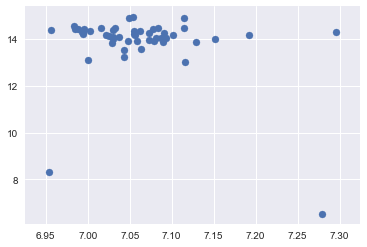

In [331]:
plt.scatter(gmv_mrp['ln_mrp'], gmv_mrp['ln_gmv'])

In [332]:
import statsmodels.formula.api as smf

In [333]:
result = smf.ols(formula = 'ln_gmv ~ ln_mrp', data = gmv_mrp).fit()

In [334]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_gmv   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.078
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0857
Time:                        02:32:00   Log-Likelihood:                -85.491
No. Observations:                  50   AIC:                             175.0
Df Residuals:                      48   BIC:                             178.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.5741     20.352      2.436      0.019       8.655      90.494
ln_mrp        -5.0574      2.882     -1.755      0.086     -10.853       0.738
==============================================================================
Omnibus:                       69.995   Durbin-Watson:                   1.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.418
Skew:                          -3.813   Prob(JB):                    1.02e-128
Kurtosis:                      17.993   Cond. No.                         759.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [335]:
cam.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'sla_diff',
       'discount_percentage', 'gmv_per_unit', 'order_payment_type_Prepaid',
       'special_sales', 'NPS', 'Stock Index', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'pay_day', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'ln_gmv', 'ln_mrp'],
      dtype='object')

In [336]:
cam.replace(to_replace = 0, value = 0.00000001, inplace = True)

In [337]:
cam['ln_TV'] = np.log(cam['TV'])
cam['ln_Digital'] = np.log(cam['Digital'])
cam['ln_Sponsorship'] = np.log(cam['Sponsorship'])
cam['ln_Online_marketing'] = np.log(cam['Online marketing'])
cam['ln_Affiliates'] = np.log(cam['Affiliates'])
cam['ln_Radio'] = np.log(cam['Radio'])
cam['ln_Content_Marketing'] = np.log(cam['Content Marketing'])
cam['ln_SEM'] = np.log(cam['SEM'])
cam['ln_Other'] = np.log(cam['Other'])

In [338]:
cam.iloc[:, 13:]

,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,pay_day,TV_adstock,...,ln_mrp,ln_TV,ln_Digital,ln_Sponsorship,ln_Online_marketing,ln_Affiliates,ln_Radio,ln_Content_Marketing,ln_SEM,ln_Other
0,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0.00,0.02,...,6.95,-4.15,-1.68,-0.61,-2.33,-3.22,-18.42,-9.59,-1.00,-18.42
3,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0.00,0.03,...,7.03,-4.15,-1.68,-0.61,-2.33,-3.22,-18.42,-9.59,-1.00,-18.42
6,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,1.00,0.04,...,7.08,-4.15,-1.68,-0.61,-2.33,-3.22,-18.42,-9.59,-1.00,-18.42
9,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0.00,0.05,...,7.05,-4.15,-1.68,-0.61,-2.33,-3.22,-18.42,-9.59,-1.00,-18.42
12,0.19,0.54,0.00,0.10,0.04,0.37,0.00,0.00,0.00,0.05,...,7.04,-4.15,-1.68,-0.61,-2.33,-3.22,-18.42,-9.59,-1.00,-18.42
15,0.09,0.08,0.00,0.01,0.01,0.18,0.00,0.00,0.00,0.04,...,7.28,-7.66,-2.37,-2.55,-4.66,-5.22,-18.42,-14.58,-1.69,-18.42
21,0.10,4.58,0.04,1.20,0.37,0.45,0.00,0.00,1.00,0.32,...,7.04,-1.26,-2.31,1.52,0.18,-1.00,-18.42,-3.11,-0.79,-18.42
24,0.10,4.61,0.04,1.20,0.37,0.46,0.00,0.00,0.00,0.54,...,7.12,-1.26,-2.31,1.53,0.18,-1.00,-18.42,-3.11,-0.79,-18.42
27,0.10,4.61,0.04,1.20,0.37,0.46,0.00,0.00,1.00,0.72,...,7.06,-1.26,-2.31,1.53,0.18,-1.00,-18.42,-3.11,-0.79,-18.42
30,0.10,4.61,0.04,1.20,0.37,0.46,0.00,0.00,0.00,0.86,...,7.09,-1.26,-2.31,1.53,0.18,-1.00,-18.42,-3.11,-0.79,-18.42


In [339]:
result_ad = smf.ols(formula = 'ln_gmv ~ ln_mrp + ln_TV + ln_Digital + ln_Sponsorship * ln_Online_marketing + ln_Affiliates + \
                    ln_Radio + ln_Content_Marketing + ln_SEM + ln_Other', data = cam).fit()

In [340]:
result_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_gmv   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     9.199
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.95e-08
Time:                        02:32:01   Log-Likelihood:                -54.589
No. Observations:                  50   AIC:                             133.2
Df Residuals:                      38   BIC:                             156.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            -25.9697     41.663     -0.623      0.537    -110.312      58.373
ln_mrp                                 4.3188      2.727      1.584      0.122      -1.202       9.840
ln_TV                                 -0.1480      1.123     -0.132      0.896      -2.421       2.125
ln_Digital                             1.1473      1.109      1.034      0.308      -1.098       3.393
ln_Sponsorship                        -0.3100      0.971     -0.319      0.751      -2.277       1.657
ln_Online_marketing                    9.6468     26.497      0.364      0.718     -43.994      63.288
ln_Sponsorship:ln_Online_marketing    -0.5071      0.381     -1.331      0.191      -1.278       0.264
ln_Affiliates                         -8.6008     27.557     -0.312      0.757     -64.386      47.185
ln_Radio                              -0.1104      1.383     -0.080      0.937      -2.910       2.689
ln_Content_Marketing                  -0.4786      0.761     -0.629      0.533      -2.019       1.062
ln_SEM                                -0.9278      1.836     -0.505      0.616      -4.644       2.789
ln_Other                               0.1418      1.209      0.117      0.907      -2.306       2.589
==============================================================================
Omnibus:                       65.548   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.523
Skew:                          -3.259   Prob(JB):                    6.88e-151
Kurtosis:                      20.013   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model has higher p-values but those can be accounted for the interaction effect between variables

In [341]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
score = cross_val_score(lr, X_train, y_train, cv=10, scoring = 'r2')

In [342]:
score

array([-429.95711471,   -2.36889003, -372.63575537,   -8.07696875,
        -92.17216689,  -32.71799937,  -39.66591889, -194.35651014,
         -3.91971305,  -10.68915602])

In [343]:
score.mean()

-118.6560193231335

# Koyck Model

### GamingAccessory Koyck Model

In [75]:
#Remove1
GamingAccessory_weekly = pd.read_csv("GamingAccessory_weekly.csv")

In [77]:
GamingAccessory_weekly.drop(['Unnamed: 0'], axis = 1, inplace = True)
GamingAccessory_weekly.head()

,week,product_analytic_sub_category,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,...,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
0,1,GamingAccessory,7758.00,5.56,1200.67,1.89,3.67,32.49,862.00,9.00,...,0.06,0.03,0.24,0.00,0.00,19.36,0.10,0.00,0.00,0.00
1,2,GamingAccessory,763139.00,6.54,1027.67,2.19,4.35,40.22,583.01,305.00,...,0.10,0.03,0.28,0.00,0.00,20.10,0.28,4.42,0.00,0.00
2,3,GamingAccessory,783978.36,5.87,855.40,2.28,3.59,46.22,494.62,328.00,...,0.12,0.03,0.29,0.00,0.00,23.18,0.00,1.40,0.00,0.00
3,4,GamingAccessory,765301.00,6.00,1002.70,2.09,3.91,39.75,599.28,247.00,...,0.14,0.03,0.29,0.00,0.00,23.06,0.00,0.90,0.00,0.00
4,5,GamingAccessory,551707.00,6.30,1047.57,2.14,4.16,41.45,630.73,135.00,...,0.14,0.03,0.29,0.00,0.00,24.57,0.00,4.63,0.00,0.00


In [346]:
GamingAccessory_by_week_lagged=GamingAccessory_weekly.assign(**{
    '{} (t-{})'.format(col, t): GamingAccessory_weekly[col].shift(t)
    for t in lags
    for col in GamingAccessory_weekly[['gmv_total','order_payment_type_Prepaid_total', 'ItemType_MassMarket_total']]
}).fillna(0)

NameError: name 'GamingAccessory_by_week' is not defined

In [347]:
HomeAudio_by_week_lagged=HomeAudio_by_week.assign(**{
    '{} (t-{})'.format(col, t): HomeAudio_by_week[col].shift(t)
    for t in lags
    for col in HomeAudio_by_week[['gmv_total','TV_total','Content Marketing_total','NPSScore_avg']]
}).fillna(0)

NameError: name 'HomeAudio_by_week' is not defined

In [79]:
GamingAccessory_by_week_lagged = GamingAccessory_weekly.assign(**{
    '{} (t-{})'.format(col, t): GamingAccessory_weekly[col].shift(t)
    for t in lags
    for col in GamingAccessory_weekly[['gmv']]
}).fillna(0)

In [80]:
GamingAccessory_by_week_lagged.head()

,week,product_analytic_sub_category,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,...,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),gmv (t-1),gmv (t-2)
0,1,GamingAccessory,7758.00,5.56,1200.67,1.89,3.67,32.49,862.00,9.00,...,0.24,0.00,0.00,19.36,0.10,0.00,0.00,0.00,0.00,0.00
1,2,GamingAccessory,763139.00,6.54,1027.67,2.19,4.35,40.22,583.01,305.00,...,0.28,0.00,0.00,20.10,0.28,4.42,0.00,0.00,7758.00,0.00
2,3,GamingAccessory,783978.36,5.87,855.40,2.28,3.59,46.22,494.62,328.00,...,0.29,0.00,0.00,23.18,0.00,1.40,0.00,0.00,763139.00,7758.00
3,4,GamingAccessory,765301.00,6.00,1002.70,2.09,3.91,39.75,599.28,247.00,...,0.29,0.00,0.00,23.06,0.00,0.90,0.00,0.00,783978.36,763139.00
4,5,GamingAccessory,551707.00,6.30,1047.57,2.14,4.16,41.45,630.73,135.00,...,0.29,0.00,0.00,24.57,0.00,4.63,0.00,0.00,765301.00,783978.36


In [81]:
game_lag = GamingAccessory_by_week_lagged.copy()

In [82]:
game_lag.columns

Index(['week', 'product_analytic_sub_category', 'gmv', 'sla', 'product_mrp',
       'product_procurement_sla', 'sla_diff', 'discount_percentage',
       'gmv_per_unit', 'order_payment_type_Prepaid', 'special_sales', 'NPS',
       'Stock Index', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'pay_day', 'TV_adstock', 'Digital_adstock',
       'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'gmv (t-1)', 'gmv (t-2)'],
      dtype='object')

In [83]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
game_lag = game_lag.select_dtypes(include=numerics)
#drop week if exists

In [84]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(game_lag, train_size = 0.7, test_size = 0.3, random_state = 100)

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

,week,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,special_sales,...,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),gmv (t-1),gmv (t-2)
25,0.48,0.63,0.79,1.07,0.24,0.80,1.19,0.63,0.23,1.00,...,0.30,0.00,0.00,0.45,0.24,0.56,0.00,0.00,0.42,0.42
48,0.94,0.53,0.77,0.79,0.05,0.86,0.69,0.76,0.22,0.00,...,0.09,0.27,0.07,0.90,0.00,0.33,0.00,0.00,1.11,0.54
52,1.02,0.16,0.56,0.68,-0.00,0.71,0.38,0.80,0.06,0.00,...,0.04,0.02,0.00,0.99,0.00,0.08,0.00,0.00,0.44,0.45
37,0.72,0.37,0.81,0.63,0.15,0.85,0.28,0.77,0.16,0.00,...,0.09,0.30,0.59,0.48,0.22,0.03,0.00,0.00,0.67,0.54
6,0.10,0.00,0.53,2.04,1.31,0.22,-0.46,3.00,0.00,0.00,...,0.00,0.00,0.00,0.98,0.00,0.23,0.00,0.00,0.00,0.16


In [86]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv')
X_train = df_train
X_train.head()

,week,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,special_sales,NPS,...,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),gmv (t-1),gmv (t-2)
26,0.50,0.84,0.94,0.16,0.87,0.89,0.65,0.16,1.00,0.13,...,0.21,0.24,0.41,0.26,0.38,0.00,0.00,0.00,0.70,0.38
41,0.80,0.81,0.82,0.10,0.87,0.33,0.96,0.73,0.00,0.48,...,0.06,0.06,0.00,0.51,0.19,0.00,0.00,0.00,0.46,0.39
28,0.54,0.82,0.74,0.17,0.86,0.59,0.69,0.18,0.00,0.17,...,0.06,0.85,0.99,0.06,0.52,0.20,0.00,1.00,0.53,0.46
38,0.74,0.82,0.68,0.15,0.86,0.22,0.83,0.25,0.00,0.30,...,0.09,0.32,0.59,0.37,0.30,1.00,0.00,0.00,0.41,0.60
17,0.32,0.82,0.54,0.04,0.90,0.57,0.69,0.15,0.00,0.02,...,0.91,0.00,0.00,0.55,0.17,0.07,0.00,0.00,0.31,0.90


In [87]:
#Model Building
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [88]:
# Running RFE 
lm = LinearRegression()

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [89]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('week', False, 11),
 ('sla', True, 1),
 ('product_mrp', False, 2),
 ('product_procurement_sla', True, 1),
 ('sla_diff', True, 1),
 ('discount_percentage', False, 19),
 ('gmv_per_unit', False, 16),
 ('order_payment_type_Prepaid', True, 1),
 ('special_sales', False, 18),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', True, 1),
 ('pay_day', False, 17),
 ('TV_adstock', False, 20),
 ('Digital_adstock', False, 4),
 ('Sponsorship_adstock', True, 1),
 ('content_marketing_adstock', False, 8),
 ('online_marketing_adstock', True, 1),
 ('affiliates_adstock', False, 6),
 ('SEM_adstock', False, 3),
 ('Radio_adstock', False, 14),
 ('Other_adstock', False, 5),
 ('Mean Temp (°C)', True, 1),
 ('Heat Deg Days (°C)', False, 10),
 ('Total Rain (mm)', False, 15),
 ('To

In [90]:
col = X_train.columns[rfe.support_]
col

Index(['sla', 'product_procurement_sla', 'sla_diff',
       'order_payment_type_Prepaid', 'NPS', 'Stock Index', 'Total Investment',
       'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'Sponsorship_adstock',
       'online_marketing_adstock', 'Mean Temp (°C)'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [91]:
X_train_rfe = X_train[col]
X_train_rfe['gmv (t-1)'] = X_train['gmv (t-1)']
X_train_rfe['gmv (t-2)'] = X_train['gmv (t-2)']

In [92]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [93]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [94]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     27.05
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.93e-09
Time:                        16:53:16   Log-Likelihood:                 71.452
No. Observations:                  37   AIC:                            -100.9
Df Residuals:                      16   BIC:                            -67.07
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [95]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Content Marketing,inf
8,TV,inf
16,Other,inf
15,Radio,inf
14,SEM,inf
13,Affiliates,inf
12,Online marketing,inf
10,Sponsorship,inf
9,Digital,inf
7,Total Investment,inf


In [96]:
#dropping gmv (t-2)   --> high p-value
X_train_new = X_train_rfe.drop(["gmv (t-2)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     28.96
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.23e-09
Time:                        16:55:37   Log-Likelihood:                 70.670
No. Observations:                  37   AIC:                            -101.3
Df Residuals:                      17   BIC:                            -69.12
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [97]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Sponsorship,inf
8,TV,inf
16,Other,inf
15,Radio,inf
14,SEM,inf
13,Affiliates,inf
12,Online marketing,inf
11,Content Marketing,inf
9,Digital,inf
7,Total Investment,inf


In [98]:
# Dropping Sponsorship_adstock --> high p-value
X_train_new = X_train_new.drop(["Sponsorship_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     30.03
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.20e-10
Time:                        16:56:10   Log-Likelihood:                 69.326
No. Observations:                  37   AIC:                            -100.7
Df Residuals:                      18   BIC:                            -70.04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [99]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Sponsorship,inf
8,TV,inf
16,Other,inf
15,Radio,inf
14,SEM,inf
13,Affiliates,inf
12,Online marketing,inf
11,Content Marketing,inf
9,Digital,inf
7,Total Investment,inf


In [100]:
# Dropping Sponsorship --> high vif
X_train_new = X_train_new.drop(["Sponsorship"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     29.28
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.08e-10
Time:                        16:56:51   Log-Likelihood:                 66.887
No. Observations:                  37   AIC:                            -97.77
Df Residuals:                      19   BIC:                            -68.78
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [101]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,product_procurement_sla,inf
3,sla_diff,inf
1,sla,inf
13,SEM,22304010.89
15,Other,16210674.76
12,Affiliates,12920747.96
14,Radio,12884388.26
11,Online marketing,6430532.04
10,Content Marketing,6374664.01
9,Digital,5991686.92


In [102]:
# Dropping product_procurement_sla --> high vif
X_train_new = X_train_new.drop(['product_procurement_sla'], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     29.28
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.08e-10
Time:                        16:57:34   Log-Likelihood:                 66.887
No. Observations:                  37   AIC:                            -97.77
Df Residuals:                      19   BIC:                            -68.78
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [103]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,SEM,22304010.89
14,Other,16210674.76
11,Affiliates,12920747.96
13,Radio,12884388.26
0,const,6928375.47
10,Online marketing,6430532.04
9,Content Marketing,6374664.01
8,Digital,5991686.92
7,TV,4654908.89
6,Total Investment,2655447.29


In [104]:
# Dropping SEM --> high vif
X_train_new = X_train_new.drop(["SEM"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     29.91
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.62e-10
Time:                        16:57:59   Log-Likelihood:                 65.271
No. Observations:                  37   AIC:                            -96.54
Df Residuals:                      20   BIC:                            -69.16
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [105]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Affiliates,13052.74
10,Online marketing,8765.64
9,Content Marketing,5535.77
0,const,4223.91
8,Digital,2977.63
6,Total Investment,2543.99
7,TV,1173.53
12,Radio,928.21
13,Other,647.18
4,NPS,272.50


In [106]:
# Dropping Stock Index --> high vif
X_train_new = X_train_new.drop(["Stock Index"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     33.45
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.75e-11
Time:                        16:59:53   Log-Likelihood:                 65.250
No. Observations:                  37   AIC:                            -98.50
Df Residuals:                      21   BIC:                            -72.72
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [107]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Affiliates,1855.33
8,Content Marketing,1602.94
9,Online marketing,1517.67
0,const,1312.58
5,Total Investment,830.78
7,Digital,667.37
11,Radio,363.63
12,Other,325.76
6,TV,319.17
2,sla_diff,88.36


In [108]:
# Dropping Content Marketing --> high p-value
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     36.28
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.19e-12
Time:                        17:00:47   Log-Likelihood:                 64.640
No. Observations:                  37   AIC:                            -99.28
Df Residuals:                      22   BIC:                            -75.12
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [109]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1144.51
8,Online marketing,935.10
9,Affiliates,898.84
10,Radio,327.72
11,Other,325.47
5,Total Investment,112.40
6,TV,65.35
4,NPS,61.55
2,sla_diff,39.73
12,online_marketing_adstock,26.79


In [110]:
# Dropping Online marketing  --> high vif
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     7.077
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.71e-05
Time:                        17:02:18   Log-Likelihood:                 35.553
No. Observations:                  37   AIC:                            -43.11
Df Residuals:                      23   BIC:                            -20.55
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [111]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,946.41
9,Radio,283.54
10,Other,279.55
8,Affiliates,65.06
6,TV,60.14
4,NPS,49.26
5,Total Investment,49.18
2,sla_diff,39.16
11,online_marketing_adstock,26.18
1,sla,23.68


In [112]:
# Dropping Affiliates --> high p-value
X_train_new = X_train_new.drop(["Affiliates"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     7.997
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.19e-06
Time:                        17:03:56   Log-Likelihood:                 35.547
No. Observations:                  37   AIC:                            -45.09
Df Residuals:                      24   BIC:                            -24.15
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [113]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,626.28
8,Radio,185.35
9,Other,182.50
5,Total Investment,47.23
6,TV,40.06
4,NPS,36.29
2,sla_diff,35.07
1,sla,22.07
10,online_marketing_adstock,21.26
7,Digital,8.89


In [114]:
# Dropping Radio --> high vif
X_train_new = X_train_new.drop(["Radio"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     5.718
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000151
Time:                        17:04:39   Log-Likelihood:                 29.037
No. Observations:                  37   AIC:                            -34.07
Df Residuals:                      25   BIC:                            -14.74
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [115]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,602.18
5,Total Investment,37.01
4,NPS,35.67
2,sla_diff,34.16
1,sla,21.84
9,online_marketing_adstock,18.77
7,Digital,7.40
6,TV,5.54
10,Mean Temp (°C),5.50
3,order_payment_type_Prepaid,3.86


In [116]:
# Dropping Total Investment --> high vif
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     6.384
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.83e-05
Time:                        17:04:54   Log-Likelihood:                 28.715
No. Observations:                  37   AIC:                            -35.43
Df Residuals:                      26   BIC:                            -17.71
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [117]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,339.38
2,sla_diff,18.43
8,online_marketing_adstock,17.80
1,sla,13.52
4,NPS,11.37
9,Mean Temp (°C),4.89
10,gmv (t-1),3.36
3,order_payment_type_Prepaid,2.99
5,TV,2.75
7,Other,2.02


In [118]:
# Dropping sla_diff --> high vif
X_train_new = X_train_new.drop(["sla_diff"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     7.171
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.00e-05
Time:                        17:05:33   Log-Likelihood:                 28.364
No. Observations:                  37   AIC:                            -36.73
Df Residuals:                      27   BIC:                            -20.62
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [119]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,279.60
7,online_marketing_adstock,16.21
3,NPS,7.80
8,Mean Temp (°C),4.87
4,TV,2.73
9,gmv (t-1),2.66
2,order_payment_type_Prepaid,2.12
6,Other,2.00
5,Digital,1.80
1,sla,1.55


In [120]:
# Dropping online_marketing_adstock --> high vif
X_train_new = X_train_new.drop(["online_marketing_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     6.286
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000113
Time:                        17:06:09   Log-Likelihood:                 24.798
No. Observations:                  37   AIC:                            -31.60
Df Residuals:                      28   BIC:                            -17.10
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [121]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,99.72
3,NPS,2.74
4,TV,2.73
7,Mean Temp (°C),2.65
6,Other,2.00
5,Digital,1.77
8,gmv (t-1),1.60
2,order_payment_type_Prepaid,1.50
1,sla,1.28


In [122]:
# Dropping Mean Temp (°C) --> high p-value
X_train_new = X_train_new.drop(["Mean Temp (°C)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     7.316
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.48e-05
Time:                        17:06:53   Log-Likelihood:                 24.598
No. Observations:                  37   AIC:                            -33.20
Df Residuals:                      29   BIC:                            -20.31
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [123]:
# Dropping sla --> high p-value
X_train_new = X_train_new.drop(["sla"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     8.757
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.51e-05
Time:                        17:07:18   Log-Likelihood:                 24.502
No. Observations:                  37   AIC:                            -35.00
Df Residuals:                      30   BIC:                            -23.73
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [124]:
# Dropping Digital --> high p- value
X_train_new = X_train_new.drop(["Digital"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.80e-06
Time:                        17:07:43   Log-Likelihood:                 24.107
No. Observations:                  37   AIC:                            -36.21
Df Residuals:                      31   BIC:                            -26.55
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [125]:
# Dropping gmv (t-1) --> high p- value
X_train_new = X_train_new.drop(["gmv (t-1)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     12.92
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.27e-06
Time:                        17:08:15   Log-Likelihood:                 23.563
No. Observations:                  37   AIC:                            -37.13
Df Residuals:                      32   BIC:                            -29.07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Making Predictions

In [ ]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv')
X_test = df_test

In [ ]:
X_train_new=X_train_new.drop('const',axis=1)

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [ ]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print(metrics.r2_score(y_test, y_pred))

### HomeAudio Koyck Model

In [213]:
#Remove1
HomeAudio_weekly = pd.read_csv("HomeAudio_weekly.csv")

In [214]:
HomeAudio_weekly.drop(['Unnamed: 0'], axis = 1, inplace = True)
HomeAudio_weekly.head()

,week,product_analytic_sub_category,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,...,online_marketing_adstock,affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
0,1,HomeAudio,12581.00,6.12,2769.38,2.25,3.88,43.49,1572.62,8.00,...,0.09,0.04,0.34,0.00,0.00,19.36,0.10,0.00,0.00,0.00
1,2,HomeAudio,1165624.00,7.49,1988.23,1.91,5.58,32.63,1284.11,190.00,...,0.14,0.04,0.41,0.00,0.00,20.10,0.28,4.42,0.00,0.00
2,3,HomeAudio,1441028.00,7.18,2063.21,1.75,5.43,32.43,1337.00,209.00,...,0.17,0.04,0.42,0.00,0.00,23.18,0.00,1.40,0.00,0.00
3,4,HomeAudio,1230725.00,7.18,1942.15,1.73,5.45,31.34,1255.98,170.00,...,0.19,0.04,0.42,0.00,0.00,23.06,0.00,0.90,0.00,0.00
4,5,HomeAudio,916000.00,7.30,1990.46,1.73,5.57,30.22,1291.96,130.00,...,0.21,0.04,0.42,0.00,0.00,24.57,0.00,4.63,0.00,0.00


In [215]:
HomeAudio_by_week_lagged=HomeAudio_weekly.assign(**{
    '{} (t-{})'.format(col, t): HomeAudio_weekly[col].shift(t)
    for t in lags
    for col in HomeAudio_weekly[['gmv']]
}).fillna(0)

In [216]:
HomeAudio_by_week_lagged.head()

,week,product_analytic_sub_category,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,...,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),gmv (t-1),gmv (t-2)
0,1,HomeAudio,12581.00,6.12,2769.38,2.25,3.88,43.49,1572.62,8.00,...,0.34,0.00,0.00,19.36,0.10,0.00,0.00,0.00,0.00,0.00
1,2,HomeAudio,1165624.00,7.49,1988.23,1.91,5.58,32.63,1284.11,190.00,...,0.41,0.00,0.00,20.10,0.28,4.42,0.00,0.00,12581.00,0.00
2,3,HomeAudio,1441028.00,7.18,2063.21,1.75,5.43,32.43,1337.00,209.00,...,0.42,0.00,0.00,23.18,0.00,1.40,0.00,0.00,1165624.00,12581.00
3,4,HomeAudio,1230725.00,7.18,1942.15,1.73,5.45,31.34,1255.98,170.00,...,0.42,0.00,0.00,23.06,0.00,0.90,0.00,0.00,1441028.00,1165624.00
4,5,HomeAudio,916000.00,7.30,1990.46,1.73,5.57,30.22,1291.96,130.00,...,0.42,0.00,0.00,24.57,0.00,4.63,0.00,0.00,1230725.00,1441028.00


In [217]:
home_lag = HomeAudio_by_week_lagged.copy()

In [218]:
home_lag.columns

Index(['week', 'product_analytic_sub_category', 'gmv', 'sla', 'product_mrp',
       'product_procurement_sla', 'sla_diff', 'discount_percentage',
       'gmv_per_unit', 'order_payment_type_Prepaid', 'special_sales', 'NPS',
       'Stock Index', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'pay_day', 'TV_adstock', 'Digital_adstock',
       'Sponsorship_adstock', 'content_marketing_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'gmv (t-1)', 'gmv (t-2)'],
      dtype='object')

In [219]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
home_lag = home_lag.select_dtypes(include=numerics)
#drop week if exists

In [220]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(home_lag, train_size = 0.7, test_size = 0.3, random_state = 100)

In [221]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train.iloc[:,:] = scaler.fit_transform(df_train)
df_test.iloc[:,:] = scaler.transform(df_test)
df_test.head()

,week,gmv,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,special_sales,...,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),gmv (t-1),gmv (t-2)
6,0.16,0.06,0.78,0.16,0.19,0.82,0.53,0.15,0.05,0.00,...,0.06,0.00,0.00,1.00,0.00,0.79,0.00,0.00,-0.00,0.26
36,0.76,0.21,0.42,0.42,0.87,0.31,0.71,0.32,0.59,0.00,...,0.04,0.26,0.38,0.44,0.27,0.22,0.18,0.00,0.32,0.36
37,0.78,0.19,0.53,0.45,1.02,0.39,0.76,0.30,0.99,0.00,...,0.02,0.13,0.04,0.27,0.40,0.18,0.18,0.00,0.27,0.32
28,0.60,0.33,0.65,0.35,0.42,0.64,0.40,0.51,0.23,1.00,...,0.04,0.50,0.10,0.33,0.36,0.21,0.00,0.00,0.30,0.33
43,0.90,0.14,0.40,0.32,1.02,0.26,1.00,0.06,0.12,0.00,...,0.11,0.38,0.18,0.62,0.13,0.02,0.00,0.00,0.22,0.24


In [222]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('gmv')
X_train = df_train
X_train.head()

,week,sla,product_mrp,product_procurement_sla,sla_diff,discount_percentage,gmv_per_unit,order_payment_type_Prepaid,special_sales,NPS,...,SEM_adstock,Radio_adstock,Other_adstock,Mean Temp (°C),Heat Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),gmv (t-1),gmv (t-2)
25,0.54,0.74,0.39,0.39,0.74,0.34,0.54,0.16,0.00,0.26,...,0.02,0.85,0.99,0.11,0.52,0.20,0.00,1.00,0.34,0.36
26,0.56,0.82,0.29,0.52,0.80,0.48,0.38,0.22,1.00,0.26,...,0.02,0.95,1.00,0.05,1.00,0.00,0.00,0.00,0.27,0.34
35,0.74,0.58,0.36,1.00,0.45,0.65,0.34,0.37,0.00,0.45,...,0.05,0.32,0.59,0.41,0.30,1.00,0.00,0.00,0.36,0.41
17,0.38,0.64,0.19,0.61,0.59,0.38,0.33,0.12,0.00,0.26,...,0.06,0.00,0.00,0.42,0.29,0.26,0.83,0.17,0.33,0.34
7,0.18,0.64,0.16,0.48,0.62,0.31,0.29,0.00,0.00,0.25,...,0.08,0.00,0.00,0.83,0.03,0.07,0.00,0.00,0.13,0.00


In [223]:
#Model Building
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [224]:
# Running RFE 
lm = LinearRegression()

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [225]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('week', False, 3),
 ('sla', True, 1),
 ('product_mrp', False, 11),
 ('product_procurement_sla', True, 1),
 ('sla_diff', True, 1),
 ('discount_percentage', False, 15),
 ('gmv_per_unit', False, 6),
 ('order_payment_type_Prepaid', True, 1),
 ('special_sales', False, 17),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', False, 19),
 ('pay_day', False, 16),
 ('TV_adstock', False, 7),
 ('Digital_adstock', False, 2),
 ('Sponsorship_adstock', False, 14),
 ('content_marketing_adstock', False, 10),
 ('online_marketing_adstock', True, 1),
 ('affiliates_adstock', True, 1),
 ('SEM_adstock', True, 1),
 ('Radio_adstock', False, 4),
 ('Other_adstock', True, 1),
 ('Mean Temp (°C)', False, 5),
 ('Heat Deg Days (°C)', False, 12),
 ('Total Rain (mm)', False, 13),
 ('To

In [226]:
col = X_train.columns[rfe.support_]
col

Index(['sla', 'product_procurement_sla', 'sla_diff',
       'order_payment_type_Prepaid', 'NPS', 'Stock Index', 'Total Investment',
       'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'online_marketing_adstock',
       'affiliates_adstock', 'SEM_adstock', 'Other_adstock'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [227]:
X_train_rfe = X_train[col]
X_train_rfe['gmv (t-1)'] = X_train['gmv (t-1)']
X_train_rfe['gmv (t-2)'] = X_train['gmv (t-2)']

In [228]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [229]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [230]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     27.44
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.26e-08
Time:                        18:56:59   Log-Likelihood:                 78.687
No. Observations:                  35   AIC:                            -117.4
Df Residuals:                      15   BIC:                            -86.27
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [233]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Content Marketing,inf
8,TV,inf
15,Radio,inf
14,SEM,inf
13,Affiliates,inf
12,Online marketing,inf
10,Sponsorship,inf
9,Digital,inf
7,Total Investment,inf
6,Stock Index,inf


In [234]:
#dropping SEM_adstock   --> high vif
X_train_new = X_train_rfe.drop(["SEM_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 2
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     30.78
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.05e-09
Time:                        18:57:53   Log-Likelihood:                 78.625
No. Observations:                  35   AIC:                            -119.3
Df Residuals:                      16   BIC:                            -89.70
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [235]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Sponsorship,inf
8,TV,inf
15,Radio,inf
14,SEM,inf
13,Affiliates,inf
12,Online marketing,inf
11,Content Marketing,inf
9,Digital,inf
7,Total Investment,inf
6,Stock Index,inf


In [236]:
# Dropping gmv (t-1) --> high p-value
X_train_new = X_train_new.drop(["gmv (t-1)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     32.77
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.04e-09
Time:                        18:58:36   Log-Likelihood:                 77.688
No. Observations:                  35   AIC:                            -119.4
Df Residuals:                      17   BIC:                            -91.38
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [237]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Sponsorship,inf
8,TV,inf
15,Radio,inf
14,SEM,inf
13,Affiliates,inf
12,Online marketing,inf
11,Content Marketing,inf
9,Digital,inf
7,Total Investment,inf
6,Stock Index,inf


In [238]:
# Dropping gmv (t-2) --> high P-VALUE
X_train_new = X_train_new.drop(["gmv (t-2)"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     34.78
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.73e-10
Time:                        18:59:46   Log-Likelihood:                 76.699
No. Observations:                  35   AIC:                            -119.4
Df Residuals:                      18   BIC:                            -92.96
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [240]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Digital,inf
15,Radio,inf
5,NPS,inf
6,Stock Index,inf
7,Total Investment,inf
8,TV,inf
10,Sponsorship,inf
11,Content Marketing,inf
12,Online marketing,inf
13,Affiliates,inf


In [241]:
# Dropping affiliates_adstock --> hH p-value
X_train_new = X_train_new.drop(['affiliates_adstock'], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     33.48
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.72e-10
Time:                        19:00:56   Log-Likelihood:                 74.051
No. Observations:                  35   AIC:                            -116.1
Df Residuals:                      19   BIC:                            -91.22
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [243]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Digital,inf
14,SEM,inf
15,Radio,inf
5,NPS,inf
6,Stock Index,inf
7,Total Investment,inf
8,TV,inf
10,Sponsorship,inf
11,Content Marketing,inf
12,Online marketing,inf


In [244]:
# Dropping Digital --> high vif
X_train_new = X_train_new.drop(["Digital"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     14.26
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.74e-07
Time:                        19:03:20   Log-Likelihood:                 59.958
No. Observations:                  35   AIC:                            -87.92
Df Residuals:                      19   BIC:                            -63.03
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [245]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,product_procurement_sla,inf
3,sla_diff,inf
1,sla,inf
7,Total Investment,487517.14
11,Online marketing,137464.21
12,Affiliates,117049.39
9,Sponsorship,114244.80
10,Content Marketing,67401.16
8,TV,36703.61
14,Radio,10278.42


In [246]:
# Dropping product_procurement_sla --> high vif
X_train_new = X_train_new.drop(["product_procurement_sla"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     14.26
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.74e-07
Time:                        19:03:41   Log-Likelihood:                 59.958
No. Observations:                  35   AIC:                            -87.92
Df Residuals:                      19   BIC:                            -63.03
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [247]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Total Investment,487517.14
10,Online marketing,137464.21
11,Affiliates,117049.39
8,Sponsorship,114244.80
9,Content Marketing,67401.16
7,TV,36703.61
13,Radio,10278.42
0,const,9529.67
12,SEM,3660.68
4,NPS,2092.83


In [248]:
# Dropping Total Investment --> high p-value
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     14.25
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.89e-07
Time:                        19:04:02   Log-Likelihood:                 58.015
No. Observations:                  35   AIC:                            -86.03
Df Residuals:                      20   BIC:                            -62.70
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [249]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Affiliates,3779.03
9,Online marketing,2242.06
0,const,1157.88
11,SEM,1117.73
8,Content Marketing,1039.34
14,Other_adstock,698.41
6,TV,423.22
12,Radio,323.97
7,Sponsorship,207.68
2,sla_diff,110.50


In [250]:
# Dropping Affiliates --> high vif
X_train_new = X_train_new.drop(["Affiliates"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     5.822
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000198
Time:                        19:04:23   Log-Likelihood:                 42.819
No. Observations:                  35   AIC:                            -57.64
Df Residuals:                      21   BIC:                            -35.86
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [254]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,593.80
12,Other_adstock,417.93
7,Content Marketing,270.72
10,Radio,265.02
9,SEM,208.90
2,sla_diff,107.21
1,sla,92.34
8,Online marketing,87.54
5,TV,75.96
6,Sponsorship,44.11


In [255]:
# Dropping SEM_adstock --> high p-value
X_train_new = X_train_new.drop(["Other_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     5.612
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000247
Time:                        19:06:22   Log-Likelihood:                 40.622
No. Observations:                  35   AIC:                            -55.24
Df Residuals:                      22   BIC:                            -35.02
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [256]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,483.67
2,sla_diff,90.90
7,Content Marketing,87.48
9,SEM,79.06
1,sla,78.53
11,online_marketing_adstock,34.39
8,Online marketing,29.50
6,Sponsorship,25.07
3,NPS,20.08
10,Radio,11.88


In [257]:
# Dropping const --> high vif
X_train_new = X_train_new.drop(["const"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     5.612
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000247
Time:                        19:06:57   Log-Likelihood:                 40.622
No. Observations:                  35   AIC:                            -55.24
Df Residuals:                      22   BIC:                            -35.02
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [258]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,sla,737.69
1,sla_diff,505.94
7,Online marketing,174.77
6,Content Marketing,137.11
10,online_marketing_adstock,121.80
8,SEM,105.84
4,TV,22.64
3,Stock Index,20.14
2,NPS,14.50
5,Sponsorship,11.61


In [259]:
# Dropping sla --> high vif
X_train_new = X_train_new.drop(["sla"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     6.266
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000109
Time:                        19:10:00   Log-Likelihood:                 40.342
No. Observations:                  35   AIC:                            -56.68
Df Residuals:                      23   BIC:                            -38.02
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [260]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Online marketing,170.68
5,Content Marketing,134.54
9,online_marketing_adstock,120.30
7,SEM,103.57
3,TV,22.18
2,Stock Index,20.02
1,NPS,11.61
4,Sponsorship,11.59
0,sla_diff,7.78
8,Radio,6.92


In [261]:
# Dropping Online marketing --> high vif
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     6.852
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.67e-05
Time:                        19:10:18   Log-Likelihood:                 39.711
No. Observations:                  35   AIC:                            -57.42
Df Residuals:                      24   BIC:                            -40.31
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [262]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Content Marketing,112.09
6,SEM,82.30
8,online_marketing_adstock,44.80
3,TV,21.25
2,Stock Index,17.33
4,Sponsorship,9.44
1,NPS,9.12
7,Radio,6.86
0,sla_diff,6.78
9,order_payment_type_Prepaid,3.68


In [263]:
# Dropping Content Marketing --> high p-value
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     6.818
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.59e-05
Time:                        19:10:59   Log-Likelihood:                 37.791
No. Observations:                  35   AIC:                            -55.58
Df Residuals:                      25   BIC:                            -40.03
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [264]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,online_marketing_adstock,29.37
2,Stock Index,15.73
3,TV,15.54
1,NPS,9.11
4,Sponsorship,8.22
0,sla_diff,6.77
5,SEM,5.35
6,Radio,3.71
8,order_payment_type_Prepaid,3.68


In [265]:
# Dropping online_marketing_adstock --> high p-value
X_train_new = X_train_new.drop(["online_marketing_adstock"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     7.960
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.24e-05
Time:                        19:11:23   Log-Likelihood:                 37.764
No. Observations:                  35   AIC:                            -57.53
Df Residuals:                      26   BIC:                            -43.53
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [266]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Sponsorship,8.03
3,TV,6.70
0,sla_diff,6.02
1,NPS,5.56
2,Stock Index,4.68
5,SEM,4.66
7,order_payment_type_Prepaid,3.58
6,Radio,1.96


In [267]:
# Dropping Sponsorship --> high vif
X_train_new = X_train_new.drop(["Sponsorship"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     7.432
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.30e-05
Time:                        19:12:47   Log-Likelihood:                 34.890
No. Observations:                  35   AIC:                            -53.78
Df Residuals:                      27   BIC:                            -41.34
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [268]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,sla_diff,5.75
1,NPS,5.54
2,Stock Index,4.66
3,TV,4.01
6,order_payment_type_Prepaid,3.52
4,SEM,3.15
5,Radio,1.58


In [269]:
# Dropping gmv (t-2) --> high p- value
X_train_new = X_train_new.drop(["Stock Index"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     8.946
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.72e-05
Time:                        19:13:35   Log-Likelihood:                 34.831
No. Observations:                  35   AIC:                            -55.66
Df Residuals:                      28   BIC:                            -44.77
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [270]:
# Dropping NPS --> high p- value
X_train_new = X_train_new.drop(["NPS"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     11.04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.10e-06
Time:                        19:14:07   Log-Likelihood:                 34.748
No. Observations:                  35   AIC:                            -57.50
Df Residuals:                      29   BIC:                            -48.16
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [271]:
# Dropping Radio --> high p- value
X_train_new = X_train_new.drop(["Radio"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     13.32
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.37e-06
Time:                        19:14:22   Log-Likelihood:                 33.960
No. Observations:                  35   AIC:                            -57.92
Df Residuals:                      30   BIC:                            -50.14
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [272]:
# Dropping TV --> high p- value
X_train_new = X_train_new.drop(["TV"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     17.81
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.63e-07
Time:                        19:15:13   Log-Likelihood:                 33.630
No. Observations:                  35   AIC:                            -59.26
Df Residuals:                      31   BIC:                            -53.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [273]:
# Dropping sla_diff --> high p- value
X_train_new = X_train_new.drop(["sla_diff"], axis = 1)
 
X_train_lm = sm.add_constant(X_train_new)

#Model 20
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     23.63
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.99e-07
Time:                        19:15:46   Log-Likelihood:                 31.967
No. Observations:                  35   AIC:                            -57.93
Df Residuals:                      32   BIC:                            -53.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Making Predictions

In [ ]:
#### Dividing into X_test and y_test
y_test = df_test.pop('gmv')
X_test = df_test

In [ ]:
X_train_new=X_train_new.drop('const',axis=1)

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [ ]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print(metrics.r2_score(y_test, y_pred))